In [2]:
from datasets import load_dataset

In [3]:
# Load our data
data = load_dataset("rotten_tomatoes")
data

README.md: 0.00B [00:00, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [4]:
data["train"][0, -1]

{'text': ['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
  'things really get weird , though not particularly scary : the movie is all portent and no content .'],
 'label': [1, 0]}

In [28]:
data["test"]

Dataset({
    features: ['text', 'label', 't5'],
    num_rows: 1066
})

## Using a Task-Specific Model

In [5]:
from transformers import pipeline
# Path to our HF model
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
# Load model into pipeline
pipe = pipeline(
  model=model_path,
  tokenizer=model_path,
  return_all_scores=True,
  device="cuda:0"
  )

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [6]:
import numpy as np
from tqdm import tqdm
from transformers.pipelines.pt_utils import KeyDataset

for output in tqdm(pipe(KeyDataset(data["test"], "text")),total=len(data["test"])):
  print(output)


  0%|          | 1/1066 [00:00<09:39,  1.84it/s]

[{'label': 'negative', 'score': 0.00516123790293932}, {'label': 'neutral', 'score': 0.040233541280031204}, {'label': 'positive', 'score': 0.9546052813529968}]



  1%|          | 10/1066 [00:00<01:04, 16.40it/s]

[{'label': 'negative', 'score': 0.007706415373831987}, {'label': 'neutral', 'score': 0.10390986502170563}, {'label': 'positive', 'score': 0.8883837461471558}]
[{'label': 'negative', 'score': 0.7359187006950378}, {'label': 'neutral', 'score': 0.242427259683609}, {'label': 'positive', 'score': 0.021654030308127403}]
[{'label': 'negative', 'score': 0.0030380741227418184}, {'label': 'neutral', 'score': 0.06267126649618149}, {'label': 'positive', 'score': 0.9342906475067139}]
[{'label': 'negative', 'score': 0.11185657232999802}, {'label': 'neutral', 'score': 0.7006849646568298}, {'label': 'positive', 'score': 0.18745848536491394}]
[{'label': 'negative', 'score': 0.6089203357696533}, {'label': 'neutral', 'score': 0.3732679784297943}, {'label': 'positive', 'score': 0.01781175285577774}]
[{'label': 'negative', 'score': 0.02079029008746147}, {'label': 'neutral', 'score': 0.45805108547210693}, {'label': 'positive', 'score': 0.5211586356163025}]
[{'label': 'negative', 'score': 0.00938819721341133


  3%|▎         | 29/1066 [00:01<00:22, 45.23it/s]

[{'label': 'negative', 'score': 0.021312450990080833}, {'label': 'neutral', 'score': 0.29876619577407837}, {'label': 'positive', 'score': 0.6799213290214539}]
[{'label': 'negative', 'score': 0.005375251639634371}, {'label': 'neutral', 'score': 0.09685274213552475}, {'label': 'positive', 'score': 0.897771954536438}]
[{'label': 'negative', 'score': 0.017783939838409424}, {'label': 'neutral', 'score': 0.6452141404151917}, {'label': 'positive', 'score': 0.33700188994407654}]
[{'label': 'negative', 'score': 0.00323072774335742}, {'label': 'neutral', 'score': 0.07248532772064209}, {'label': 'positive', 'score': 0.9242839813232422}]
[{'label': 'negative', 'score': 0.017986487597227097}, {'label': 'neutral', 'score': 0.22880437970161438}, {'label': 'positive', 'score': 0.7532091736793518}]
[{'label': 'negative', 'score': 0.6301175355911255}, {'label': 'neutral', 'score': 0.3416175842285156}, {'label': 'positive', 'score': 0.02826482057571411}]
[{'label': 'negative', 'score': 0.3761067092418670


  4%|▍         | 45/1066 [00:01<00:17, 57.23it/s]

[{'label': 'negative', 'score': 0.010330351069569588}, {'label': 'neutral', 'score': 0.06858718395233154}, {'label': 'positive', 'score': 0.9210824370384216}]
[{'label': 'negative', 'score': 0.03833687677979469}, {'label': 'neutral', 'score': 0.2148401439189911}, {'label': 'positive', 'score': 0.7468230128288269}]
[{'label': 'negative', 'score': 0.3054850101470947}, {'label': 'neutral', 'score': 0.6537953615188599}, {'label': 'positive', 'score': 0.0407196469604969}]
[{'label': 'negative', 'score': 0.004782760050147772}, {'label': 'neutral', 'score': 0.01715654507279396}, {'label': 'positive', 'score': 0.9780606627464294}]
[{'label': 'negative', 'score': 0.047649551182985306}, {'label': 'neutral', 'score': 0.559797465801239}, {'label': 'positive', 'score': 0.3925529420375824}]
[{'label': 'negative', 'score': 0.19740675389766693}, {'label': 'neutral', 'score': 0.5586875677108765}, {'label': 'positive', 'score': 0.2439056783914566}]
[{'label': 'negative', 'score': 0.31281614303588867}, {


  6%|▌         | 64/1066 [00:01<00:13, 72.41it/s]

[{'label': 'negative', 'score': 0.007796997204422951}, {'label': 'neutral', 'score': 0.2009699046611786}, {'label': 'positive', 'score': 0.7912330627441406}]
[{'label': 'negative', 'score': 0.7773857712745667}, {'label': 'neutral', 'score': 0.21240389347076416}, {'label': 'positive', 'score': 0.010210336185991764}]
[{'label': 'negative', 'score': 0.005911027546972036}, {'label': 'neutral', 'score': 0.3430910110473633}, {'label': 'positive', 'score': 0.6509979963302612}]
[{'label': 'negative', 'score': 0.2585769295692444}, {'label': 'neutral', 'score': 0.6864831447601318}, {'label': 'positive', 'score': 0.05493989214301109}]
[{'label': 'negative', 'score': 0.5550523400306702}, {'label': 'neutral', 'score': 0.4173392653465271}, {'label': 'positive', 'score': 0.02760838344693184}]
[{'label': 'negative', 'score': 0.9156798124313354}, {'label': 'neutral', 'score': 0.07883252948522568}, {'label': 'positive', 'score': 0.0054876431822776794}]
[{'label': 'negative', 'score': 0.00412390474230051


  8%|▊         | 83/1066 [00:01<00:12, 81.16it/s]

[{'label': 'negative', 'score': 0.10857462137937546}, {'label': 'neutral', 'score': 0.5616807341575623}, {'label': 'positive', 'score': 0.3297446370124817}]
[{'label': 'negative', 'score': 0.0685538649559021}, {'label': 'neutral', 'score': 0.4107334613800049}, {'label': 'positive', 'score': 0.520712673664093}]
[{'label': 'negative', 'score': 0.04627422243356705}, {'label': 'neutral', 'score': 0.8667869567871094}, {'label': 'positive', 'score': 0.08693877607584}]
[{'label': 'negative', 'score': 0.005539709236472845}, {'label': 'neutral', 'score': 0.05022042989730835}, {'label': 'positive', 'score': 0.9442398548126221}]
[{'label': 'negative', 'score': 0.006308492738753557}, {'label': 'neutral', 'score': 0.02206370234489441}, {'label': 'positive', 'score': 0.9716278314590454}]
[{'label': 'negative', 'score': 0.009892808273434639}, {'label': 'neutral', 'score': 0.26663923263549805}, {'label': 'positive', 'score': 0.7234679460525513}]
[{'label': 'negative', 'score': 0.002110513858497143}, {


 10%|▉         | 102/1066 [00:01<00:11, 83.69it/s]

[{'label': 'negative', 'score': 0.039708565920591354}, {'label': 'neutral', 'score': 0.5544771552085876}, {'label': 'positive', 'score': 0.40581434965133667}]
[{'label': 'negative', 'score': 0.008983832783997059}, {'label': 'neutral', 'score': 0.047556072473526}, {'label': 'positive', 'score': 0.9434601664543152}]
[{'label': 'negative', 'score': 0.07915183156728745}, {'label': 'neutral', 'score': 0.846429169178009}, {'label': 'positive', 'score': 0.07441902160644531}]
[{'label': 'negative', 'score': 0.25810322165489197}, {'label': 'neutral', 'score': 0.711287796497345}, {'label': 'positive', 'score': 0.030609045177698135}]
[{'label': 'negative', 'score': 0.04830848053097725}, {'label': 'neutral', 'score': 0.24951885640621185}, {'label': 'positive', 'score': 0.7021726369857788}]
[{'label': 'negative', 'score': 0.13105615973472595}, {'label': 'neutral', 'score': 0.5230548977851868}, {'label': 'positive', 'score': 0.34588897228240967}]
[{'label': 'negative', 'score': 0.005516680423170328}


 11%|█▏        | 120/1066 [00:02<00:11, 80.69it/s]

[{'label': 'negative', 'score': 0.026214202865958214}, {'label': 'neutral', 'score': 0.15626288950443268}, {'label': 'positive', 'score': 0.8175229430198669}]
[{'label': 'negative', 'score': 0.006228516343981028}, {'label': 'neutral', 'score': 0.10623834282159805}, {'label': 'positive', 'score': 0.8875331282615662}]
[{'label': 'negative', 'score': 0.04067418724298477}, {'label': 'neutral', 'score': 0.5054827928543091}, {'label': 'positive', 'score': 0.45384299755096436}]
[{'label': 'negative', 'score': 0.001664957613684237}, {'label': 'neutral', 'score': 0.016735197976231575}, {'label': 'positive', 'score': 0.9815998673439026}]
[{'label': 'negative', 'score': 0.6975506544113159}, {'label': 'neutral', 'score': 0.28685101866722107}, {'label': 'positive', 'score': 0.015598395839333534}]
[{'label': 'negative', 'score': 0.004893415607511997}, {'label': 'neutral', 'score': 0.015543251298367977}, {'label': 'positive', 'score': 0.979563295841217}]
[{'label': 'negative', 'score': 0.015321332961


 13%|█▎        | 137/1066 [00:02<00:17, 54.05it/s]

[{'label': 'negative', 'score': 0.02798163890838623}, {'label': 'neutral', 'score': 0.21580184996128082}, {'label': 'positive', 'score': 0.7562164664268494}]
[{'label': 'negative', 'score': 0.01809043064713478}, {'label': 'neutral', 'score': 0.15041771531105042}, {'label': 'positive', 'score': 0.8314918875694275}]
[{'label': 'negative', 'score': 0.018397631123661995}, {'label': 'neutral', 'score': 0.29615142941474915}, {'label': 'positive', 'score': 0.6854509711265564}]
[{'label': 'negative', 'score': 0.10492675751447678}, {'label': 'neutral', 'score': 0.6448068022727966}, {'label': 'positive', 'score': 0.250266432762146}]
[{'label': 'negative', 'score': 0.011307370848953724}, {'label': 'neutral', 'score': 0.2559613883495331}, {'label': 'positive', 'score': 0.732731282711029}]
[{'label': 'negative', 'score': 0.5925799608230591}, {'label': 'neutral', 'score': 0.33660444617271423}, {'label': 'positive', 'score': 0.07081557810306549}]
[{'label': 'negative', 'score': 0.010373483411967754},


 15%|█▍        | 156/1066 [00:02<00:13, 69.13it/s]

[{'label': 'negative', 'score': 0.010792135260999203}, {'label': 'neutral', 'score': 0.11749317497015}, {'label': 'positive', 'score': 0.8717146515846252}]
[{'label': 'negative', 'score': 0.2121729999780655}, {'label': 'neutral', 'score': 0.625764012336731}, {'label': 'positive', 'score': 0.16206301748752594}]
[{'label': 'negative', 'score': 0.008681557141244411}, {'label': 'neutral', 'score': 0.2107255756855011}, {'label': 'positive', 'score': 0.7805927991867065}]
[{'label': 'negative', 'score': 0.015180451795458794}, {'label': 'neutral', 'score': 0.09097331017255783}, {'label': 'positive', 'score': 0.8938462734222412}]
[{'label': 'negative', 'score': 0.004555705469101667}, {'label': 'neutral', 'score': 0.032583896070718765}, {'label': 'positive', 'score': 0.9628603458404541}]
[{'label': 'negative', 'score': 0.1248084083199501}, {'label': 'neutral', 'score': 0.5606802701950073}, {'label': 'positive', 'score': 0.3145112991333008}]
[{'label': 'negative', 'score': 0.0056866551749408245},


 16%|█▋        | 174/1066 [00:03<00:11, 75.95it/s]

[{'label': 'negative', 'score': 0.0054746828973293304}, {'label': 'neutral', 'score': 0.09683717787265778}, {'label': 'positive', 'score': 0.8976882100105286}]
[{'label': 'negative', 'score': 0.21825985610485077}, {'label': 'neutral', 'score': 0.6047546863555908}, {'label': 'positive', 'score': 0.1769854724407196}]
[{'label': 'negative', 'score': 0.2497836798429489}, {'label': 'neutral', 'score': 0.6830699443817139}, {'label': 'positive', 'score': 0.06714636832475662}]
[{'label': 'negative', 'score': 0.011261212639510632}, {'label': 'neutral', 'score': 0.08044943958520889}, {'label': 'positive', 'score': 0.90828937292099}]
[{'label': 'negative', 'score': 0.023959346115589142}, {'label': 'neutral', 'score': 0.6721143126487732}, {'label': 'positive', 'score': 0.30392634868621826}]
[{'label': 'negative', 'score': 0.007257650140672922}, {'label': 'neutral', 'score': 0.15973705053329468}, {'label': 'positive', 'score': 0.8330052495002747}]
[{'label': 'negative', 'score': 0.03471964225172996


 17%|█▋        | 183/1066 [00:03<00:11, 78.65it/s]

[{'label': 'negative', 'score': 0.022102531045675278}, {'label': 'neutral', 'score': 0.645305871963501}, {'label': 'positive', 'score': 0.33259162306785583}]
[{'label': 'negative', 'score': 0.002645733067765832}, {'label': 'neutral', 'score': 0.03487992286682129}, {'label': 'positive', 'score': 0.9624743461608887}]
[{'label': 'negative', 'score': 0.14986982941627502}, {'label': 'neutral', 'score': 0.7854985594749451}, {'label': 'positive', 'score': 0.0646316409111023}]
[{'label': 'negative', 'score': 0.025660919025540352}, {'label': 'neutral', 'score': 0.22117121517658234}, {'label': 'positive', 'score': 0.7531679272651672}]
[{'label': 'negative', 'score': 0.005689749028533697}, {'label': 'neutral', 'score': 0.027708450332283974}, {'label': 'positive', 'score': 0.9666017889976501}]
[{'label': 'negative', 'score': 0.012433602474629879}, {'label': 'neutral', 'score': 0.38242655992507935}, {'label': 'positive', 'score': 0.6051398515701294}]
[{'label': 'negative', 'score': 0.03781099617481


 19%|█▉        | 200/1066 [00:03<00:14, 59.20it/s]

[{'label': 'negative', 'score': 0.004766081925481558}, {'label': 'neutral', 'score': 0.057040490210056305}, {'label': 'positive', 'score': 0.9381934404373169}]
[{'label': 'negative', 'score': 0.004919934086501598}, {'label': 'neutral', 'score': 0.0917547345161438}, {'label': 'positive', 'score': 0.9033253192901611}]
[{'label': 'negative', 'score': 0.29403260350227356}, {'label': 'neutral', 'score': 0.5480082035064697}, {'label': 'positive', 'score': 0.1579591929912567}]
[{'label': 'negative', 'score': 0.04165680333971977}, {'label': 'neutral', 'score': 0.3799320459365845}, {'label': 'positive', 'score': 0.5784111618995667}]
[{'label': 'negative', 'score': 0.0021061499137431383}, {'label': 'neutral', 'score': 0.015530087053775787}, {'label': 'positive', 'score': 0.9823638200759888}]
[{'label': 'negative', 'score': 0.019480692222714424}, {'label': 'neutral', 'score': 0.25675371289253235}, {'label': 'positive', 'score': 0.7237655520439148}]
[{'label': 'negative', 'score': 0.01650872267782


 20%|██        | 214/1066 [00:03<00:16, 50.17it/s]

[{'label': 'negative', 'score': 0.006107482127845287}, {'label': 'neutral', 'score': 0.05331481248140335}, {'label': 'positive', 'score': 0.9405776858329773}]
[{'label': 'negative', 'score': 0.007412584964185953}, {'label': 'neutral', 'score': 0.08992548286914825}, {'label': 'positive', 'score': 0.902661919593811}]
[{'label': 'negative', 'score': 0.009991845116019249}, {'label': 'neutral', 'score': 0.09083155542612076}, {'label': 'positive', 'score': 0.8991765975952148}]
[{'label': 'negative', 'score': 0.1364155262708664}, {'label': 'neutral', 'score': 0.5743498206138611}, {'label': 'positive', 'score': 0.28923460841178894}]
[{'label': 'negative', 'score': 0.009188062511384487}, {'label': 'neutral', 'score': 0.08093520253896713}, {'label': 'positive', 'score': 0.9098767638206482}]
[{'label': 'negative', 'score': 0.006314809899777174}, {'label': 'neutral', 'score': 0.24485240876674652}, {'label': 'positive', 'score': 0.7488328218460083}]
[{'label': 'negative', 'score': 0.220439001917839


 21%|██▏       | 227/1066 [00:04<00:17, 48.56it/s]

[{'label': 'negative', 'score': 0.1180327907204628}, {'label': 'neutral', 'score': 0.6413570046424866}, {'label': 'positive', 'score': 0.24061021208763123}]
[{'label': 'negative', 'score': 0.007162043824791908}, {'label': 'neutral', 'score': 0.06089784950017929}, {'label': 'positive', 'score': 0.9319400787353516}]
[{'label': 'negative', 'score': 0.6358984112739563}, {'label': 'neutral', 'score': 0.33604466915130615}, {'label': 'positive', 'score': 0.028056930750608444}]
[{'label': 'negative', 'score': 0.138326033949852}, {'label': 'neutral', 'score': 0.7878756523132324}, {'label': 'positive', 'score': 0.07379834353923798}]
[{'label': 'negative', 'score': 0.020215988159179688}, {'label': 'neutral', 'score': 0.3642401099205017}, {'label': 'positive', 'score': 0.6155439019203186}]
[{'label': 'negative', 'score': 0.8446612358093262}, {'label': 'neutral', 'score': 0.12579312920570374}, {'label': 'positive', 'score': 0.02954559214413166}]
[{'label': 'negative', 'score': 0.004421036224812269}


 23%|██▎       | 245/1066 [00:04<00:12, 63.28it/s]

[{'label': 'negative', 'score': 0.6055797934532166}, {'label': 'neutral', 'score': 0.3375435471534729}, {'label': 'positive', 'score': 0.05687671899795532}]
[{'label': 'negative', 'score': 0.0027424634899944067}, {'label': 'neutral', 'score': 0.05353567376732826}, {'label': 'positive', 'score': 0.9437218904495239}]
[{'label': 'negative', 'score': 0.6035827398300171}, {'label': 'neutral', 'score': 0.3121178150177002}, {'label': 'positive', 'score': 0.08429945260286331}]
[{'label': 'negative', 'score': 0.007312547415494919}, {'label': 'neutral', 'score': 0.05141120031476021}, {'label': 'positive', 'score': 0.9412762522697449}]
[{'label': 'negative', 'score': 0.011746039614081383}, {'label': 'neutral', 'score': 0.26703575253486633}, {'label': 'positive', 'score': 0.7212181687355042}]
[{'label': 'negative', 'score': 0.05672817304730415}, {'label': 'neutral', 'score': 0.25783848762512207}, {'label': 'positive', 'score': 0.6854333281517029}]
[{'label': 'negative', 'score': 0.0107109639793634


 24%|██▍       | 261/1066 [00:04<00:11, 69.62it/s]

[{'label': 'negative', 'score': 0.002597193466499448}, {'label': 'neutral', 'score': 0.016512174159288406}, {'label': 'positive', 'score': 0.9808906316757202}]
[{'label': 'negative', 'score': 0.005441606510430574}, {'label': 'neutral', 'score': 0.08771682530641556}, {'label': 'positive', 'score': 0.906841516494751}]
[{'label': 'negative', 'score': 0.0067494404502213}, {'label': 'neutral', 'score': 0.037665966898202896}, {'label': 'positive', 'score': 0.9555845856666565}]
[{'label': 'negative', 'score': 0.7149198055267334}, {'label': 'neutral', 'score': 0.25282490253448486}, {'label': 'positive', 'score': 0.032255299389362335}]
[{'label': 'negative', 'score': 0.740323007106781}, {'label': 'neutral', 'score': 0.22019034624099731}, {'label': 'positive', 'score': 0.039486657828092575}]
[{'label': 'negative', 'score': 0.05837947875261307}, {'label': 'neutral', 'score': 0.4013150930404663}, {'label': 'positive', 'score': 0.5403054356575012}]
[{'label': 'negative', 'score': 0.4550007283687591


 25%|██▌       | 269/1066 [00:04<00:11, 71.03it/s]

[{'label': 'negative', 'score': 0.008386436849832535}, {'label': 'neutral', 'score': 0.0907846987247467}, {'label': 'positive', 'score': 0.9008288979530334}]
[{'label': 'negative', 'score': 0.022627411410212517}, {'label': 'neutral', 'score': 0.28652146458625793}, {'label': 'positive', 'score': 0.6908511519432068}]
[{'label': 'negative', 'score': 0.8106994032859802}, {'label': 'neutral', 'score': 0.171746626496315}, {'label': 'positive', 'score': 0.01755397766828537}]
[{'label': 'negative', 'score': 0.007508717477321625}, {'label': 'neutral', 'score': 0.06594511866569519}, {'label': 'positive', 'score': 0.9265461564064026}]
[{'label': 'negative', 'score': 0.06270011514425278}, {'label': 'neutral', 'score': 0.5290517210960388}, {'label': 'positive', 'score': 0.4082481861114502}]
[{'label': 'negative', 'score': 0.006561925634741783}, {'label': 'neutral', 'score': 0.02190745808184147}, {'label': 'positive', 'score': 0.9715306162834167}]
[{'label': 'negative', 'score': 0.3507561683654785},


 27%|██▋       | 284/1066 [00:05<00:12, 63.13it/s]

[{'label': 'negative', 'score': 0.2282176911830902}, {'label': 'neutral', 'score': 0.4334336817264557}, {'label': 'positive', 'score': 0.3383485674858093}]
[{'label': 'negative', 'score': 0.017373492941260338}, {'label': 'neutral', 'score': 0.23154020309448242}, {'label': 'positive', 'score': 0.7510862946510315}]
[{'label': 'negative', 'score': 0.021427365019917488}, {'label': 'neutral', 'score': 0.23045490682125092}, {'label': 'positive', 'score': 0.7481176853179932}]
[{'label': 'negative', 'score': 0.0037758012767881155}, {'label': 'neutral', 'score': 0.03283489868044853}, {'label': 'positive', 'score': 0.9633892774581909}]
[{'label': 'negative', 'score': 0.27416205406188965}, {'label': 'neutral', 'score': 0.5766223073005676}, {'label': 'positive', 'score': 0.1492156833410263}]
[{'label': 'negative', 'score': 0.5145049691200256}, {'label': 'neutral', 'score': 0.4153863191604614}, {'label': 'positive', 'score': 0.07010871171951294}]
[{'label': 'negative', 'score': 0.27733030915260315}


 28%|██▊       | 298/1066 [00:05<00:12, 63.77it/s]

[{'label': 'negative', 'score': 0.03184615448117256}, {'label': 'neutral', 'score': 0.8215730786323547}, {'label': 'positive', 'score': 0.14658072590827942}]
[{'label': 'negative', 'score': 0.03709375113248825}, {'label': 'neutral', 'score': 0.2263796031475067}, {'label': 'positive', 'score': 0.736526608467102}]
[{'label': 'negative', 'score': 0.8035751581192017}, {'label': 'neutral', 'score': 0.17401067912578583}, {'label': 'positive', 'score': 0.022414155304431915}]
[{'label': 'negative', 'score': 0.0054159509018063545}, {'label': 'neutral', 'score': 0.016563408076763153}, {'label': 'positive', 'score': 0.9780206084251404}]
[{'label': 'negative', 'score': 0.08345644176006317}, {'label': 'neutral', 'score': 0.6752660274505615}, {'label': 'positive', 'score': 0.24127750098705292}]
[{'label': 'negative', 'score': 0.644315779209137}, {'label': 'neutral', 'score': 0.33920881152153015}, {'label': 'positive', 'score': 0.01647539995610714}]
[{'label': 'negative', 'score': 0.17371027171611786


 29%|██▉       | 312/1066 [00:05<00:11, 64.27it/s]

[{'label': 'negative', 'score': 0.0332326777279377}, {'label': 'neutral', 'score': 0.7128419876098633}, {'label': 'positive', 'score': 0.2539253234863281}]
[{'label': 'negative', 'score': 0.012381937354803085}, {'label': 'neutral', 'score': 0.09289011359214783}, {'label': 'positive', 'score': 0.8947279453277588}]
[{'label': 'negative', 'score': 0.0019559708889573812}, {'label': 'neutral', 'score': 0.03820507973432541}, {'label': 'positive', 'score': 0.9598389863967896}]
[{'label': 'negative', 'score': 0.038479436188936234}, {'label': 'neutral', 'score': 0.796612560749054}, {'label': 'positive', 'score': 0.1649080365896225}]
[{'label': 'negative', 'score': 0.7112642526626587}, {'label': 'neutral', 'score': 0.2582598626613617}, {'label': 'positive', 'score': 0.03047589771449566}]
[{'label': 'negative', 'score': 0.13076648116111755}, {'label': 'neutral', 'score': 0.3331226110458374}, {'label': 'positive', 'score': 0.5361109375953674}]
[{'label': 'negative', 'score': 0.2707810401916504}, {


 31%|███       | 326/1066 [00:05<00:12, 60.96it/s]

[{'label': 'negative', 'score': 0.06587094813585281}, {'label': 'neutral', 'score': 0.37759047746658325}, {'label': 'positive', 'score': 0.5565385818481445}]
[{'label': 'negative', 'score': 0.0036890499759465456}, {'label': 'neutral', 'score': 0.05085347220301628}, {'label': 'positive', 'score': 0.9454574584960938}]
[{'label': 'negative', 'score': 0.002986464649438858}, {'label': 'neutral', 'score': 0.021572163328528404}, {'label': 'positive', 'score': 0.9754413962364197}]
[{'label': 'negative', 'score': 0.024610934779047966}, {'label': 'neutral', 'score': 0.28527215123176575}, {'label': 'positive', 'score': 0.6901168823242188}]
[{'label': 'negative', 'score': 0.009965969249606133}, {'label': 'neutral', 'score': 0.05795237049460411}, {'label': 'positive', 'score': 0.9320816397666931}]
[{'label': 'negative', 'score': 0.014445645734667778}, {'label': 'neutral', 'score': 0.3387826681137085}, {'label': 'positive', 'score': 0.6467716693878174}]
[{'label': 'negative', 'score': 0.038066044449


 32%|███▏      | 340/1066 [00:05<00:11, 62.35it/s]

[{'label': 'negative', 'score': 0.04005652293562889}, {'label': 'neutral', 'score': 0.29119381308555603}, {'label': 'positive', 'score': 0.6687496900558472}]
[{'label': 'negative', 'score': 0.0031479778699576855}, {'label': 'neutral', 'score': 0.03213568031787872}, {'label': 'positive', 'score': 0.9647163152694702}]
[{'label': 'negative', 'score': 0.6606985926628113}, {'label': 'neutral', 'score': 0.31334948539733887}, {'label': 'positive', 'score': 0.025951938703656197}]
[{'label': 'negative', 'score': 0.004803820513188839}, {'label': 'neutral', 'score': 0.013589825481176376}, {'label': 'positive', 'score': 0.9816064238548279}]
[{'label': 'negative', 'score': 0.00639071362093091}, {'label': 'neutral', 'score': 0.06487006694078445}, {'label': 'positive', 'score': 0.9287391901016235}]
[{'label': 'negative', 'score': 0.15672631561756134}, {'label': 'neutral', 'score': 0.6581264138221741}, {'label': 'positive', 'score': 0.18514735996723175}]
[{'label': 'negative', 'score': 0.8307964205741


 33%|███▎      | 348/1066 [00:06<00:10, 65.45it/s]

[{'label': 'negative', 'score': 0.66640305519104}, {'label': 'neutral', 'score': 0.29807621240615845}, {'label': 'positive', 'score': 0.035520702600479126}]
[{'label': 'negative', 'score': 0.02771405316889286}, {'label': 'neutral', 'score': 0.5097192525863647}, {'label': 'positive', 'score': 0.46256670355796814}]
[{'label': 'negative', 'score': 0.2611145079135895}, {'label': 'neutral', 'score': 0.6448854207992554}, {'label': 'positive', 'score': 0.09400010108947754}]
[{'label': 'negative', 'score': 0.002176973270252347}, {'label': 'neutral', 'score': 0.017828458920121193}, {'label': 'positive', 'score': 0.979994535446167}]
[{'label': 'negative', 'score': 0.07848984003067017}, {'label': 'neutral', 'score': 0.38574981689453125}, {'label': 'positive', 'score': 0.5357603430747986}]
[{'label': 'negative', 'score': 0.006276844069361687}, {'label': 'neutral', 'score': 0.05461819842457771}, {'label': 'positive', 'score': 0.9391049742698669}]
[{'label': 'negative', 'score': 0.1658291071653366},


 34%|███▍      | 363/1066 [00:06<00:10, 67.72it/s]

[{'label': 'negative', 'score': 0.12119494378566742}, {'label': 'neutral', 'score': 0.3844311535358429}, {'label': 'positive', 'score': 0.4943739175796509}]
[{'label': 'negative', 'score': 0.10746428370475769}, {'label': 'neutral', 'score': 0.4207611382007599}, {'label': 'positive', 'score': 0.47177454829216003}]
[{'label': 'negative', 'score': 0.4962935149669647}, {'label': 'neutral', 'score': 0.45147740840911865}, {'label': 'positive', 'score': 0.05222907289862633}]
[{'label': 'negative', 'score': 0.46516653895378113}, {'label': 'neutral', 'score': 0.4786781668663025}, {'label': 'positive', 'score': 0.05615534260869026}]
[{'label': 'negative', 'score': 0.08897944539785385}, {'label': 'neutral', 'score': 0.31753677129745483}, {'label': 'positive', 'score': 0.5934838652610779}]
[{'label': 'negative', 'score': 0.0025165677070617676}, {'label': 'neutral', 'score': 0.017115890979766846}, {'label': 'positive', 'score': 0.9803675413131714}]
[{'label': 'negative', 'score': 0.0079751573503017


 35%|███▍      | 370/1066 [00:06<00:14, 49.45it/s]

[{'label': 'negative', 'score': 0.00955542828887701}, {'label': 'neutral', 'score': 0.19302767515182495}, {'label': 'positive', 'score': 0.7974168658256531}]
[{'label': 'negative', 'score': 0.20594264566898346}, {'label': 'neutral', 'score': 0.37157735228538513}, {'label': 'positive', 'score': 0.4224800169467926}]
[{'label': 'negative', 'score': 0.0772726908326149}, {'label': 'neutral', 'score': 0.5292173027992249}, {'label': 'positive', 'score': 0.39350998401641846}]
[{'label': 'negative', 'score': 0.06129465997219086}, {'label': 'neutral', 'score': 0.8474611043930054}, {'label': 'positive', 'score': 0.09124429523944855}]
[{'label': 'negative', 'score': 0.011445533484220505}, {'label': 'neutral', 'score': 0.1020195484161377}, {'label': 'positive', 'score': 0.8865349292755127}]



 35%|███▌      | 376/1066 [00:06<00:19, 34.54it/s]

[{'label': 'negative', 'score': 0.760262131690979}, {'label': 'neutral', 'score': 0.2252705842256546}, {'label': 'positive', 'score': 0.01446725893765688}]
[{'label': 'negative', 'score': 0.7261491417884827}, {'label': 'neutral', 'score': 0.25921279191970825}, {'label': 'positive', 'score': 0.014638046734035015}]
[{'label': 'negative', 'score': 0.0027375256177037954}, {'label': 'neutral', 'score': 0.008430283516645432}, {'label': 'positive', 'score': 0.9888322353363037}]
[{'label': 'negative', 'score': 0.1751139909029007}, {'label': 'neutral', 'score': 0.6958995461463928}, {'label': 'positive', 'score': 0.12898653745651245}]
[{'label': 'negative', 'score': 0.004606885835528374}, {'label': 'neutral', 'score': 0.03418206050992012}, {'label': 'positive', 'score': 0.9612110257148743}]



 36%|███▌      | 386/1066 [00:07<00:18, 36.50it/s]

[{'label': 'negative', 'score': 0.0063071842305362225}, {'label': 'neutral', 'score': 0.048918843269348145}, {'label': 'positive', 'score': 0.9447739124298096}]
[{'label': 'negative', 'score': 0.023438887670636177}, {'label': 'neutral', 'score': 0.17461082339286804}, {'label': 'positive', 'score': 0.801950216293335}]
[{'label': 'negative', 'score': 0.07646944373846054}, {'label': 'neutral', 'score': 0.548349916934967}, {'label': 'positive', 'score': 0.3751806318759918}]
[{'label': 'negative', 'score': 0.4785875678062439}, {'label': 'neutral', 'score': 0.504984438419342}, {'label': 'positive', 'score': 0.016427967697381973}]
[{'label': 'negative', 'score': 0.4325687885284424}, {'label': 'neutral', 'score': 0.45449480414390564}, {'label': 'positive', 'score': 0.11293637007474899}]
[{'label': 'negative', 'score': 0.41889509558677673}, {'label': 'neutral', 'score': 0.258574515581131}, {'label': 'positive', 'score': 0.3225303590297699}]
[{'label': 'negative', 'score': 0.07759417593479156}, 


 37%|███▋      | 398/1066 [00:07<00:14, 44.86it/s]

[{'label': 'negative', 'score': 0.003584915306419134}, {'label': 'neutral', 'score': 0.030559921637177467}, {'label': 'positive', 'score': 0.9658551812171936}]
[{'label': 'negative', 'score': 0.015207699500024319}, {'label': 'neutral', 'score': 0.6522490382194519}, {'label': 'positive', 'score': 0.332543283700943}]
[{'label': 'negative', 'score': 0.012923076748847961}, {'label': 'neutral', 'score': 0.2542099356651306}, {'label': 'positive', 'score': 0.7328670024871826}]
[{'label': 'negative', 'score': 0.006262246053665876}, {'label': 'neutral', 'score': 0.12789951264858246}, {'label': 'positive', 'score': 0.8658382296562195}]
[{'label': 'negative', 'score': 0.04494306817650795}, {'label': 'neutral', 'score': 0.547929584980011}, {'label': 'positive', 'score': 0.40712735056877136}]
[{'label': 'negative', 'score': 0.016403457149863243}, {'label': 'neutral', 'score': 0.21271292865276337}, {'label': 'positive', 'score': 0.7708836793899536}]
[{'label': 'negative', 'score': 0.0100890994071960


 38%|███▊      | 410/1066 [00:07<00:13, 48.77it/s]

[{'label': 'negative', 'score': 0.8848649263381958}, {'label': 'neutral', 'score': 0.11011733114719391}, {'label': 'positive', 'score': 0.005017744842916727}]
[{'label': 'negative', 'score': 0.0035615903325378895}, {'label': 'neutral', 'score': 0.036820780485868454}, {'label': 'positive', 'score': 0.9596176743507385}]
[{'label': 'negative', 'score': 0.025496965274214745}, {'label': 'neutral', 'score': 0.3352912664413452}, {'label': 'positive', 'score': 0.6392117738723755}]
[{'label': 'negative', 'score': 0.06481387466192245}, {'label': 'neutral', 'score': 0.6153386235237122}, {'label': 'positive', 'score': 0.3198474645614624}]
[{'label': 'negative', 'score': 0.006732509005814791}, {'label': 'neutral', 'score': 0.04092773050069809}, {'label': 'positive', 'score': 0.9523398280143738}]
[{'label': 'negative', 'score': 0.1334691196680069}, {'label': 'neutral', 'score': 0.6901820302009583}, {'label': 'positive', 'score': 0.17634883522987366}]
[{'label': 'negative', 'score': 0.008884916082024


 40%|███▉      | 422/1066 [00:07<00:12, 50.06it/s]

[{'label': 'negative', 'score': 0.7742869257926941}, {'label': 'neutral', 'score': 0.2132241576910019}, {'label': 'positive', 'score': 0.012488958425819874}]
[{'label': 'negative', 'score': 0.0012918541906401515}, {'label': 'neutral', 'score': 0.028268937021493912}, {'label': 'positive', 'score': 0.9704392552375793}]
[{'label': 'negative', 'score': 0.023306092247366905}, {'label': 'neutral', 'score': 0.17689619958400726}, {'label': 'positive', 'score': 0.7997977137565613}]
[{'label': 'negative', 'score': 0.013612288050353527}, {'label': 'neutral', 'score': 0.15997016429901123}, {'label': 'positive', 'score': 0.8264175057411194}]
[{'label': 'negative', 'score': 0.008064248599112034}, {'label': 'neutral', 'score': 0.08135116100311279}, {'label': 'positive', 'score': 0.9105846285820007}]
[{'label': 'negative', 'score': 0.004007875453680754}, {'label': 'neutral', 'score': 0.02002476342022419}, {'label': 'positive', 'score': 0.9759673476219177}]
[{'label': 'negative', 'score': 0.71082770824


 40%|████      | 428/1066 [00:07<00:12, 49.75it/s]


[{'label': 'negative', 'score': 0.00578244449570775}, {'label': 'neutral', 'score': 0.111045703291893}, {'label': 'positive', 'score': 0.8831718564033508}]
[{'label': 'negative', 'score': 0.3581109046936035}, {'label': 'neutral', 'score': 0.35826990008354187}, {'label': 'positive', 'score': 0.2836191654205322}]
[{'label': 'negative', 'score': 0.007684953510761261}, {'label': 'neutral', 'score': 0.13991214334964752}, {'label': 'positive', 'score': 0.852402925491333}]
[{'label': 'negative', 'score': 0.026307977735996246}, {'label': 'neutral', 'score': 0.27113351225852966}, {'label': 'positive', 'score': 0.7025584578514099}]
[{'label': 'negative', 'score': 0.01946152187883854}, {'label': 'neutral', 'score': 0.13893838226795197}, {'label': 'positive', 'score': 0.8416001200675964}]
[{'label': 'negative', 'score': 0.01063314825296402}, {'label': 'neutral', 'score': 0.0792389065027237}, {'label': 'positive', 'score': 0.9101279377937317}]
[{'label': 'negative', 'score': 0.4306120276451111}, {'

 43%|████▎     | 456/1066 [00:08<00:08, 75.11it/s]

[{'label': 'negative', 'score': 0.03759557381272316}, {'label': 'neutral', 'score': 0.20606708526611328}, {'label': 'positive', 'score': 0.7563373446464539}]
[{'label': 'negative', 'score': 0.01493953075259924}, {'label': 'neutral', 'score': 0.6710540652275085}, {'label': 'positive', 'score': 0.31400638818740845}]
[{'label': 'negative', 'score': 0.005359967704862356}, {'label': 'neutral', 'score': 0.25512173771858215}, {'label': 'positive', 'score': 0.7395182847976685}]
[{'label': 'negative', 'score': 0.004770350642502308}, {'label': 'neutral', 'score': 0.09576329588890076}, {'label': 'positive', 'score': 0.8994663953781128}]
[{'label': 'negative', 'score': 0.012098617851734161}, {'label': 'neutral', 'score': 0.1763192117214203}, {'label': 'positive', 'score': 0.8115821480751038}]
[{'label': 'negative', 'score': 0.8204095959663391}, {'label': 'neutral', 'score': 0.16353917121887207}, {'label': 'positive', 'score': 0.016051169484853745}]
[{'label': 'negative', 'score': 0.018320117145776


 45%|████▍     | 476/1066 [00:08<00:06, 86.45it/s]

[{'label': 'negative', 'score': 0.8388179540634155}, {'label': 'neutral', 'score': 0.14535175263881683}, {'label': 'positive', 'score': 0.015830276533961296}]
[{'label': 'negative', 'score': 0.015000841580331326}, {'label': 'neutral', 'score': 0.27641600370407104}, {'label': 'positive', 'score': 0.7085831761360168}]
[{'label': 'negative', 'score': 0.005719109904021025}, {'label': 'neutral', 'score': 0.03929556533694267}, {'label': 'positive', 'score': 0.9549853205680847}]
[{'label': 'negative', 'score': 0.008050061762332916}, {'label': 'neutral', 'score': 0.04164981096982956}, {'label': 'positive', 'score': 0.9503000974655151}]
[{'label': 'negative', 'score': 0.03176141530275345}, {'label': 'neutral', 'score': 0.38593789935112}, {'label': 'positive', 'score': 0.5823006629943848}]
[{'label': 'negative', 'score': 0.023194435983896255}, {'label': 'neutral', 'score': 0.19046644866466522}, {'label': 'positive', 'score': 0.7863391041755676}]
[{'label': 'negative', 'score': 0.3412761688232422


 47%|████▋     | 496/1066 [00:08<00:06, 89.90it/s]

[{'label': 'negative', 'score': 0.594712495803833}, {'label': 'neutral', 'score': 0.3903711140155792}, {'label': 'positive', 'score': 0.014916439540684223}]
[{'label': 'negative', 'score': 0.5266531705856323}, {'label': 'neutral', 'score': 0.3628624379634857}, {'label': 'positive', 'score': 0.11048436909914017}]
[{'label': 'negative', 'score': 0.0024272047448903322}, {'label': 'neutral', 'score': 0.008911412209272385}, {'label': 'positive', 'score': 0.9886614084243774}]
[{'label': 'negative', 'score': 0.009605537168681622}, {'label': 'neutral', 'score': 0.27368542551994324}, {'label': 'positive', 'score': 0.7167090177536011}]
[{'label': 'negative', 'score': 0.12459605187177658}, {'label': 'neutral', 'score': 0.7112131118774414}, {'label': 'positive', 'score': 0.1641908437013626}]
[{'label': 'negative', 'score': 0.6102350950241089}, {'label': 'neutral', 'score': 0.36727458238601685}, {'label': 'positive', 'score': 0.02249031327664852}]
[{'label': 'negative', 'score': 0.00640292791649699


 48%|████▊     | 516/1066 [00:08<00:05, 92.86it/s]

[{'label': 'negative', 'score': 0.07474514096975327}, {'label': 'neutral', 'score': 0.7896885275840759}, {'label': 'positive', 'score': 0.13556630909442902}]
[{'label': 'negative', 'score': 0.15621058642864227}, {'label': 'neutral', 'score': 0.6163774728775024}, {'label': 'positive', 'score': 0.2274118959903717}]
[{'label': 'negative', 'score': 0.5836472511291504}, {'label': 'neutral', 'score': 0.39025798439979553}, {'label': 'positive', 'score': 0.02609478309750557}]
[{'label': 'negative', 'score': 0.6279873847961426}, {'label': 'neutral', 'score': 0.3196423351764679}, {'label': 'positive', 'score': 0.05237030237913132}]
[{'label': 'negative', 'score': 0.0030973635148257017}, {'label': 'neutral', 'score': 0.03399462625384331}, {'label': 'positive', 'score': 0.9629080295562744}]
[{'label': 'negative', 'score': 0.19393141567707062}, {'label': 'neutral', 'score': 0.380930632352829}, {'label': 'positive', 'score': 0.4251379668712616}]
[{'label': 'negative', 'score': 0.06459031999111176}, 


 49%|████▉     | 526/1066 [00:08<00:06, 88.74it/s]

[{'label': 'negative', 'score': 0.8852242231369019}, {'label': 'neutral', 'score': 0.09315025806427002}, {'label': 'positive', 'score': 0.021625559777021408}]
[{'label': 'negative', 'score': 0.00879142340272665}, {'label': 'neutral', 'score': 0.05927881598472595}, {'label': 'positive', 'score': 0.9319297075271606}]
[{'label': 'negative', 'score': 0.02724316716194153}, {'label': 'neutral', 'score': 0.2593322992324829}, {'label': 'positive', 'score': 0.713424563407898}]
[{'label': 'negative', 'score': 0.06829582899808884}, {'label': 'neutral', 'score': 0.8465803265571594}, {'label': 'positive', 'score': 0.08512382954359055}]
[{'label': 'negative', 'score': 0.029188819229602814}, {'label': 'neutral', 'score': 0.8471373915672302}, {'label': 'positive', 'score': 0.12367384135723114}]
[{'label': 'negative', 'score': 0.006313478108495474}, {'label': 'neutral', 'score': 0.23707205057144165}, {'label': 'positive', 'score': 0.7566144466400146}]
[{'label': 'negative', 'score': 0.00677763111889362


 51%|█████     | 545/1066 [00:09<00:05, 89.32it/s]

[{'label': 'negative', 'score': 0.005326590966433287}, {'label': 'neutral', 'score': 0.051601387560367584}, {'label': 'positive', 'score': 0.9430720806121826}]
[{'label': 'negative', 'score': 0.20883823931217194}, {'label': 'neutral', 'score': 0.6762635707855225}, {'label': 'positive', 'score': 0.1148981899023056}]
[{'label': 'negative', 'score': 0.3564302325248718}, {'label': 'neutral', 'score': 0.5906150937080383}, {'label': 'positive', 'score': 0.05295466259121895}]
[{'label': 'negative', 'score': 0.9043666124343872}, {'label': 'neutral', 'score': 0.08999848365783691}, {'label': 'positive', 'score': 0.005634920205920935}]
[{'label': 'negative', 'score': 0.23732531070709229}, {'label': 'neutral', 'score': 0.5875407457351685}, {'label': 'positive', 'score': 0.17513394355773926}]
[{'label': 'negative', 'score': 0.8499660491943359}, {'label': 'neutral', 'score': 0.14141671359539032}, {'label': 'positive', 'score': 0.008617288433015347}]
[{'label': 'negative', 'score': 0.1820228099822998


 53%|█████▎    | 565/1066 [00:09<00:05, 92.84it/s]

[{'label': 'negative', 'score': 0.8981384634971619}, {'label': 'neutral', 'score': 0.09618592262268066}, {'label': 'positive', 'score': 0.005675557069480419}]
[{'label': 'negative', 'score': 0.927751362323761}, {'label': 'neutral', 'score': 0.06647754460573196}, {'label': 'positive', 'score': 0.005771096795797348}]
[{'label': 'negative', 'score': 0.7327820658683777}, {'label': 'neutral', 'score': 0.20241552591323853}, {'label': 'positive', 'score': 0.06480240076780319}]
[{'label': 'negative', 'score': 0.13171495497226715}, {'label': 'neutral', 'score': 0.25593483448028564}, {'label': 'positive', 'score': 0.6123502254486084}]
[{'label': 'negative', 'score': 0.7155117392539978}, {'label': 'neutral', 'score': 0.27192422747612}, {'label': 'positive', 'score': 0.012564023025333881}]
[{'label': 'negative', 'score': 0.43262526392936707}, {'label': 'neutral', 'score': 0.34225860238075256}, {'label': 'positive', 'score': 0.22511613368988037}]
[{'label': 'negative', 'score': 0.7780526876449585},


 55%|█████▍    | 585/1066 [00:09<00:05, 94.15it/s]

[{'label': 'negative', 'score': 0.5668438076972961}, {'label': 'neutral', 'score': 0.31301435828208923}, {'label': 'positive', 'score': 0.12014181166887283}]
[{'label': 'negative', 'score': 0.21187442541122437}, {'label': 'neutral', 'score': 0.6559985876083374}, {'label': 'positive', 'score': 0.13212698698043823}]
[{'label': 'negative', 'score': 0.9252367615699768}, {'label': 'neutral', 'score': 0.06922562420368195}, {'label': 'positive', 'score': 0.00553767429664731}]
[{'label': 'negative', 'score': 0.8472709655761719}, {'label': 'neutral', 'score': 0.14482903480529785}, {'label': 'positive', 'score': 0.007900050841271877}]
[{'label': 'negative', 'score': 0.338215708732605}, {'label': 'neutral', 'score': 0.3699072599411011}, {'label': 'positive', 'score': 0.29187703132629395}]
[{'label': 'negative', 'score': 0.5096285939216614}, {'label': 'neutral', 'score': 0.45671939849853516}, {'label': 'positive', 'score': 0.033652082085609436}]
[{'label': 'negative', 'score': 0.8354758024215698},


 57%|█████▋    | 605/1066 [00:09<00:04, 95.03it/s]

[{'label': 'negative', 'score': 0.24839748442173004}, {'label': 'neutral', 'score': 0.7244323492050171}, {'label': 'positive', 'score': 0.0271700918674469}]
[{'label': 'negative', 'score': 0.7118675112724304}, {'label': 'neutral', 'score': 0.203474760055542}, {'label': 'positive', 'score': 0.0846577137708664}]
[{'label': 'negative', 'score': 0.5370847582817078}, {'label': 'neutral', 'score': 0.3963763415813446}, {'label': 'positive', 'score': 0.06653887033462524}]
[{'label': 'negative', 'score': 0.8665197491645813}, {'label': 'neutral', 'score': 0.12279284745454788}, {'label': 'positive', 'score': 0.010687331669032574}]
[{'label': 'negative', 'score': 0.09526358544826508}, {'label': 'neutral', 'score': 0.5206834673881531}, {'label': 'positive', 'score': 0.3840530216693878}]
[{'label': 'negative', 'score': 0.1982516199350357}, {'label': 'neutral', 'score': 0.6870508193969727}, {'label': 'positive', 'score': 0.11469758301973343}]
[{'label': 'negative', 'score': 0.9432651400566101}, {'lab


 59%|█████▊    | 625/1066 [00:10<00:05, 87.90it/s]

[{'label': 'negative', 'score': 0.8855524659156799}, {'label': 'neutral', 'score': 0.1066775694489479}, {'label': 'positive', 'score': 0.007769930642098188}]
[{'label': 'negative', 'score': 0.09422092139720917}, {'label': 'neutral', 'score': 0.5519737005233765}, {'label': 'positive', 'score': 0.3538053631782532}]
[{'label': 'negative', 'score': 0.2859926223754883}, {'label': 'neutral', 'score': 0.6266562342643738}, {'label': 'positive', 'score': 0.08735107630491257}]
[{'label': 'negative', 'score': 0.3071920871734619}, {'label': 'neutral', 'score': 0.5935884714126587}, {'label': 'positive', 'score': 0.09921947121620178}]
[{'label': 'negative', 'score': 0.9131876230239868}, {'label': 'neutral', 'score': 0.08071178197860718}, {'label': 'positive', 'score': 0.0061006746254861355}]
[{'label': 'negative', 'score': 0.8126862645149231}, {'label': 'neutral', 'score': 0.1761038452386856}, {'label': 'positive', 'score': 0.011209852062165737}]
[{'label': 'negative', 'score': 0.9140846729278564}, 


 60%|██████    | 644/1066 [00:10<00:04, 90.77it/s]

[{'label': 'negative', 'score': 0.8287672996520996}, {'label': 'neutral', 'score': 0.16188716888427734}, {'label': 'positive', 'score': 0.009345454163849354}]
[{'label': 'negative', 'score': 0.31297439336776733}, {'label': 'neutral', 'score': 0.6543467044830322}, {'label': 'positive', 'score': 0.03267883136868477}]
[{'label': 'negative', 'score': 0.07939175516366959}, {'label': 'neutral', 'score': 0.6772881746292114}, {'label': 'positive', 'score': 0.24332013726234436}]
[{'label': 'negative', 'score': 0.004781657829880714}, {'label': 'neutral', 'score': 0.10459505766630173}, {'label': 'positive', 'score': 0.8906232714653015}]
[{'label': 'negative', 'score': 0.8429850339889526}, {'label': 'neutral', 'score': 0.1485978066921234}, {'label': 'positive', 'score': 0.008417133241891861}]
[{'label': 'negative', 'score': 0.895501434803009}, {'label': 'neutral', 'score': 0.09256529808044434}, {'label': 'positive', 'score': 0.011933318339288235}]
[{'label': 'negative', 'score': 0.8736305236816406


 62%|██████▏   | 664/1066 [00:10<00:04, 92.60it/s]

[{'label': 'negative', 'score': 0.5651645064353943}, {'label': 'neutral', 'score': 0.38933899998664856}, {'label': 'positive', 'score': 0.04549652338027954}]
[{'label': 'negative', 'score': 0.9295216202735901}, {'label': 'neutral', 'score': 0.06570131331682205}, {'label': 'positive', 'score': 0.004777166061103344}]
[{'label': 'negative', 'score': 0.8467283248901367}, {'label': 'neutral', 'score': 0.14573726058006287}, {'label': 'positive', 'score': 0.007534401956945658}]
[{'label': 'negative', 'score': 0.8853058815002441}, {'label': 'neutral', 'score': 0.10770575702190399}, {'label': 'positive', 'score': 0.006988293956965208}]
[{'label': 'negative', 'score': 0.2004404067993164}, {'label': 'neutral', 'score': 0.6007668375968933}, {'label': 'positive', 'score': 0.19879281520843506}]
[{'label': 'negative', 'score': 0.4623749554157257}, {'label': 'neutral', 'score': 0.43842947483062744}, {'label': 'positive', 'score': 0.09919559955596924}]
[{'label': 'negative', 'score': 0.8428382277488708


 64%|██████▍   | 684/1066 [00:10<00:04, 92.94it/s]

[{'label': 'negative', 'score': 0.9030670523643494}, {'label': 'neutral', 'score': 0.08785182982683182}, {'label': 'positive', 'score': 0.009081119671463966}]
[{'label': 'negative', 'score': 0.15355783700942993}, {'label': 'neutral', 'score': 0.7801553010940552}, {'label': 'positive', 'score': 0.06628689169883728}]
[{'label': 'negative', 'score': 0.8644670844078064}, {'label': 'neutral', 'score': 0.13010147213935852}, {'label': 'positive', 'score': 0.005431398283690214}]
[{'label': 'negative', 'score': 0.1583186239004135}, {'label': 'neutral', 'score': 0.7681375741958618}, {'label': 'positive', 'score': 0.07354371249675751}]
[{'label': 'negative', 'score': 0.7858617901802063}, {'label': 'neutral', 'score': 0.19408074021339417}, {'label': 'positive', 'score': 0.02005740813910961}]
[{'label': 'negative', 'score': 0.9385553598403931}, {'label': 'neutral', 'score': 0.05565643683075905}, {'label': 'positive', 'score': 0.005788224749267101}]
[{'label': 'negative', 'score': 0.7441865801811218


 66%|██████▌   | 704/1066 [00:10<00:03, 92.99it/s]

[{'label': 'negative', 'score': 0.013201289810240269}, {'label': 'neutral', 'score': 0.06607498228549957}, {'label': 'positive', 'score': 0.9207237362861633}]
[{'label': 'negative', 'score': 0.8553139567375183}, {'label': 'neutral', 'score': 0.13670766353607178}, {'label': 'positive', 'score': 0.007978426292538643}]
[{'label': 'negative', 'score': 0.0034724094439297915}, {'label': 'neutral', 'score': 0.036127328872680664}, {'label': 'positive', 'score': 0.9604002237319946}]
[{'label': 'negative', 'score': 0.3755152225494385}, {'label': 'neutral', 'score': 0.606181263923645}, {'label': 'positive', 'score': 0.018303513526916504}]
[{'label': 'negative', 'score': 0.8356499075889587}, {'label': 'neutral', 'score': 0.15215614438056946}, {'label': 'positive', 'score': 0.01219397597014904}]
[{'label': 'negative', 'score': 0.28004729747772217}, {'label': 'neutral', 'score': 0.6440010070800781}, {'label': 'positive', 'score': 0.07595167309045792}]
[{'label': 'negative', 'score': 0.76699215173721


 68%|██████▊   | 724/1066 [00:11<00:03, 86.98it/s]

[{'label': 'negative', 'score': 0.17351828515529633}, {'label': 'neutral', 'score': 0.778293251991272}, {'label': 'positive', 'score': 0.04818855971097946}]
[{'label': 'negative', 'score': 0.8388807773590088}, {'label': 'neutral', 'score': 0.14974822103977203}, {'label': 'positive', 'score': 0.011370928026735783}]
[{'label': 'negative', 'score': 0.3999386727809906}, {'label': 'neutral', 'score': 0.5654231905937195}, {'label': 'positive', 'score': 0.0346381701529026}]
[{'label': 'negative', 'score': 0.0029038917273283005}, {'label': 'neutral', 'score': 0.11123651266098022}, {'label': 'positive', 'score': 0.8858596682548523}]
[{'label': 'negative', 'score': 0.9485816359519958}, {'label': 'neutral', 'score': 0.046499378979206085}, {'label': 'positive', 'score': 0.004918968770653009}]
[{'label': 'negative', 'score': 0.9074541926383972}, {'label': 'neutral', 'score': 0.08625478297472}, {'label': 'positive', 'score': 0.006291016470640898}]
[{'label': 'negative', 'score': 0.5480144619941711},


 70%|██████▉   | 743/1066 [00:11<00:03, 89.20it/s]

[{'label': 'negative', 'score': 0.37317559123039246}, {'label': 'neutral', 'score': 0.5640849471092224}, {'label': 'positive', 'score': 0.06273949146270752}]
[{'label': 'negative', 'score': 0.4316008388996124}, {'label': 'neutral', 'score': 0.5286926031112671}, {'label': 'positive', 'score': 0.0397065170109272}]
[{'label': 'negative', 'score': 0.7326355576515198}, {'label': 'neutral', 'score': 0.23786182701587677}, {'label': 'positive', 'score': 0.029502566903829575}]
[{'label': 'negative', 'score': 0.2638428211212158}, {'label': 'neutral', 'score': 0.6797470450401306}, {'label': 'positive', 'score': 0.05641014873981476}]
[{'label': 'negative', 'score': 0.045635614544153214}, {'label': 'neutral', 'score': 0.3867388367652893}, {'label': 'positive', 'score': 0.5676255822181702}]
[{'label': 'negative', 'score': 0.7985168695449829}, {'label': 'neutral', 'score': 0.1914670169353485}, {'label': 'positive', 'score': 0.010016189888119698}]
[{'label': 'negative', 'score': 0.057960182428359985},


 71%|███████▏  | 761/1066 [00:11<00:03, 89.16it/s]

[{'label': 'negative', 'score': 0.13152873516082764}, {'label': 'neutral', 'score': 0.46451467275619507}, {'label': 'positive', 'score': 0.4039565622806549}]
[{'label': 'negative', 'score': 0.40392011404037476}, {'label': 'neutral', 'score': 0.43658682703971863}, {'label': 'positive', 'score': 0.1594930738210678}]
[{'label': 'negative', 'score': 0.7626108527183533}, {'label': 'neutral', 'score': 0.21871335804462433}, {'label': 'positive', 'score': 0.018675779923796654}]
[{'label': 'negative', 'score': 0.11061184853315353}, {'label': 'neutral', 'score': 0.5071610808372498}, {'label': 'positive', 'score': 0.3822270631790161}]
[{'label': 'negative', 'score': 0.8869035840034485}, {'label': 'neutral', 'score': 0.10556907951831818}, {'label': 'positive', 'score': 0.007527353707700968}]
[{'label': 'negative', 'score': 0.8659119009971619}, {'label': 'neutral', 'score': 0.12739714980125427}, {'label': 'positive', 'score': 0.0066909478046}]
[{'label': 'negative', 'score': 0.9447041153907776}, {'


 73%|███████▎  | 780/1066 [00:11<00:03, 89.12it/s]

[{'label': 'negative', 'score': 0.13229461014270782}, {'label': 'neutral', 'score': 0.6216564774513245}, {'label': 'positive', 'score': 0.24604889750480652}]
[{'label': 'negative', 'score': 0.8783907294273376}, {'label': 'neutral', 'score': 0.11354229599237442}, {'label': 'positive', 'score': 0.00806697178632021}]
[{'label': 'negative', 'score': 0.8614567518234253}, {'label': 'neutral', 'score': 0.13064689934253693}, {'label': 'positive', 'score': 0.007896453142166138}]
[{'label': 'negative', 'score': 0.07827816903591156}, {'label': 'neutral', 'score': 0.7941140532493591}, {'label': 'positive', 'score': 0.12760771811008453}]
[{'label': 'negative', 'score': 0.9410891532897949}, {'label': 'neutral', 'score': 0.052831247448921204}, {'label': 'positive', 'score': 0.00607957923784852}]
[{'label': 'negative', 'score': 0.9565891027450562}, {'label': 'neutral', 'score': 0.038135282695293427}, {'label': 'positive', 'score': 0.00527573237195611}]
[{'label': 'negative', 'score': 0.077260769903659


 75%|███████▍  | 799/1066 [00:11<00:02, 91.35it/s]

[{'label': 'negative', 'score': 0.7245181202888489}, {'label': 'neutral', 'score': 0.2544165551662445}, {'label': 'positive', 'score': 0.02106529287993908}]
[{'label': 'negative', 'score': 0.7709086537361145}, {'label': 'neutral', 'score': 0.21845246851444244}, {'label': 'positive', 'score': 0.010638873092830181}]
[{'label': 'negative', 'score': 0.931069552898407}, {'label': 'neutral', 'score': 0.06131558120250702}, {'label': 'positive', 'score': 0.007614844478666782}]
[{'label': 'negative', 'score': 0.7240949273109436}, {'label': 'neutral', 'score': 0.2543744742870331}, {'label': 'positive', 'score': 0.02153061516582966}]
[{'label': 'negative', 'score': 0.43205466866493225}, {'label': 'neutral', 'score': 0.5376876592636108}, {'label': 'positive', 'score': 0.030257588252425194}]
[{'label': 'negative', 'score': 0.9448360800743103}, {'label': 'neutral', 'score': 0.04915865883231163}, {'label': 'positive', 'score': 0.006005279254168272}]
[{'label': 'negative', 'score': 0.8152981400489807}


 77%|███████▋  | 818/1066 [00:12<00:02, 86.11it/s]

[{'label': 'negative', 'score': 0.8926860094070435}, {'label': 'neutral', 'score': 0.10038141161203384}, {'label': 'positive', 'score': 0.006932555697858334}]
[{'label': 'negative', 'score': 0.466309517621994}, {'label': 'neutral', 'score': 0.5152891278266907}, {'label': 'positive', 'score': 0.018401343375444412}]
[{'label': 'negative', 'score': 0.7214322686195374}, {'label': 'neutral', 'score': 0.25851958990097046}, {'label': 'positive', 'score': 0.020048128440976143}]
[{'label': 'negative', 'score': 0.8505814671516418}, {'label': 'neutral', 'score': 0.14080870151519775}, {'label': 'positive', 'score': 0.00860984530299902}]
[{'label': 'negative', 'score': 0.7746880650520325}, {'label': 'neutral', 'score': 0.20189806818962097}, {'label': 'positive', 'score': 0.02341388538479805}]
[{'label': 'negative', 'score': 0.8073559403419495}, {'label': 'neutral', 'score': 0.18571065366268158}, {'label': 'positive', 'score': 0.006933445576578379}]
[{'label': 'negative', 'score': 0.0153698343783617


 79%|███████▊  | 838/1066 [00:12<00:02, 90.05it/s]

[{'label': 'negative', 'score': 0.06437452882528305}, {'label': 'neutral', 'score': 0.6592407822608948}, {'label': 'positive', 'score': 0.27638474106788635}]
[{'label': 'negative', 'score': 0.03339071944355965}, {'label': 'neutral', 'score': 0.5126718878746033}, {'label': 'positive', 'score': 0.4539373815059662}]
[{'label': 'negative', 'score': 0.8993638753890991}, {'label': 'neutral', 'score': 0.09411027282476425}, {'label': 'positive', 'score': 0.006525818258523941}]
[{'label': 'negative', 'score': 0.7187612652778625}, {'label': 'neutral', 'score': 0.22982533276081085}, {'label': 'positive', 'score': 0.05141344666481018}]
[{'label': 'negative', 'score': 0.9121776223182678}, {'label': 'neutral', 'score': 0.0796486958861351}, {'label': 'positive', 'score': 0.00817368645220995}]
[{'label': 'negative', 'score': 0.9296979904174805}, {'label': 'neutral', 'score': 0.06467892229557037}, {'label': 'positive', 'score': 0.005623066332191229}]
[{'label': 'negative', 'score': 0.797836422920227}, 


 80%|████████  | 858/1066 [00:12<00:02, 91.11it/s]

[{'label': 'negative', 'score': 0.3622879385948181}, {'label': 'neutral', 'score': 0.49279871582984924}, {'label': 'positive', 'score': 0.14491334557533264}]
[{'label': 'negative', 'score': 0.9382104277610779}, {'label': 'neutral', 'score': 0.056459102779626846}, {'label': 'positive', 'score': 0.0053304508328437805}]
[{'label': 'negative', 'score': 0.9274208545684814}, {'label': 'neutral', 'score': 0.06492337584495544}, {'label': 'positive', 'score': 0.007655750494450331}]
[{'label': 'negative', 'score': 0.27379876375198364}, {'label': 'neutral', 'score': 0.42125529050827026}, {'label': 'positive', 'score': 0.3049458861351013}]
[{'label': 'negative', 'score': 0.399323970079422}, {'label': 'neutral', 'score': 0.47433993220329285}, {'label': 'positive', 'score': 0.12633603811264038}]
[{'label': 'negative', 'score': 0.8147960305213928}, {'label': 'neutral', 'score': 0.171378493309021}, {'label': 'positive', 'score': 0.013825499452650547}]
[{'label': 'negative', 'score': 0.847304105758667}


 82%|████████▏ | 878/1066 [00:12<00:02, 92.16it/s]

[{'label': 'negative', 'score': 0.9135173559188843}, {'label': 'neutral', 'score': 0.08050673454999924}, {'label': 'positive', 'score': 0.005975842475891113}]
[{'label': 'negative', 'score': 0.42185962200164795}, {'label': 'neutral', 'score': 0.4617401957511902}, {'label': 'positive', 'score': 0.11640013754367828}]
[{'label': 'negative', 'score': 0.03281252458691597}, {'label': 'neutral', 'score': 0.4124671220779419}, {'label': 'positive', 'score': 0.554720401763916}]
[{'label': 'negative', 'score': 0.840038537979126}, {'label': 'neutral', 'score': 0.13985422253608704}, {'label': 'positive', 'score': 0.020107196643948555}]
[{'label': 'negative', 'score': 0.550760805606842}, {'label': 'neutral', 'score': 0.4289152920246124}, {'label': 'positive', 'score': 0.02032386139035225}]
[{'label': 'negative', 'score': 0.7694594264030457}, {'label': 'neutral', 'score': 0.21835678815841675}, {'label': 'positive', 'score': 0.012183773331344128}]
[{'label': 'negative', 'score': 0.8131422400474548}, {


 84%|████████▍ | 897/1066 [00:13<00:01, 89.60it/s]

[{'label': 'negative', 'score': 0.3232812285423279}, {'label': 'neutral', 'score': 0.639225423336029}, {'label': 'positive', 'score': 0.03749343752861023}]
[{'label': 'negative', 'score': 0.8954306840896606}, {'label': 'neutral', 'score': 0.09776278585195541}, {'label': 'positive', 'score': 0.006806550547480583}]
[{'label': 'negative', 'score': 0.8030716776847839}, {'label': 'neutral', 'score': 0.12642477452754974}, {'label': 'positive', 'score': 0.07050356268882751}]
[{'label': 'negative', 'score': 0.907863974571228}, {'label': 'neutral', 'score': 0.08633740991353989}, {'label': 'positive', 'score': 0.005798681639134884}]
[{'label': 'negative', 'score': 0.7362194061279297}, {'label': 'neutral', 'score': 0.24753029644489288}, {'label': 'positive', 'score': 0.016250289976596832}]
[{'label': 'negative', 'score': 0.45074793696403503}, {'label': 'neutral', 'score': 0.4954215884208679}, {'label': 'positive', 'score': 0.05383049696683884}]
[{'label': 'negative', 'score': 0.43937915563583374}


 85%|████████▍ | 906/1066 [00:13<00:01, 85.09it/s]

[{'label': 'negative', 'score': 0.32029989361763}, {'label': 'neutral', 'score': 0.5896623730659485}, {'label': 'positive', 'score': 0.0900377482175827}]
[{'label': 'negative', 'score': 0.8535465598106384}, {'label': 'neutral', 'score': 0.13633812963962555}, {'label': 'positive', 'score': 0.010115208104252815}]
[{'label': 'negative', 'score': 0.9308661222457886}, {'label': 'neutral', 'score': 0.06161843612790108}, {'label': 'positive', 'score': 0.007515376433730125}]
[{'label': 'negative', 'score': 0.9221712350845337}, {'label': 'neutral', 'score': 0.07066748291254044}, {'label': 'positive', 'score': 0.007161279208958149}]
[{'label': 'negative', 'score': 0.24375765025615692}, {'label': 'neutral', 'score': 0.6137199401855469}, {'label': 'positive', 'score': 0.14252246916294098}]
[{'label': 'negative', 'score': 0.598917543888092}, {'label': 'neutral', 'score': 0.37323859333992004}, {'label': 'positive', 'score': 0.027843885123729706}]
[{'label': 'negative', 'score': 0.15447992086410522},


 87%|████████▋ | 926/1066 [00:13<00:01, 89.33it/s]

[{'label': 'negative', 'score': 0.806181013584137}, {'label': 'neutral', 'score': 0.16279207170009613}, {'label': 'positive', 'score': 0.031026912853121758}]
[{'label': 'negative', 'score': 0.8330516219139099}, {'label': 'neutral', 'score': 0.15443271398544312}, {'label': 'positive', 'score': 0.01251568365842104}]
[{'label': 'negative', 'score': 0.8949126601219177}, {'label': 'neutral', 'score': 0.0893108993768692}, {'label': 'positive', 'score': 0.015776460990309715}]
[{'label': 'negative', 'score': 0.9297144412994385}, {'label': 'neutral', 'score': 0.06451167911291122}, {'label': 'positive', 'score': 0.005773779936134815}]
[{'label': 'negative', 'score': 0.9485237002372742}, {'label': 'neutral', 'score': 0.04726559668779373}, {'label': 'positive', 'score': 0.004210766404867172}]
[{'label': 'negative', 'score': 0.8747669458389282}, {'label': 'neutral', 'score': 0.11902928352355957}, {'label': 'positive', 'score': 0.006203759461641312}]
[{'label': 'negative', 'score': 0.394902229309082


 89%|████████▊ | 945/1066 [00:13<00:01, 91.18it/s]

[{'label': 'negative', 'score': 0.02905162423849106}, {'label': 'neutral', 'score': 0.12263713777065277}, {'label': 'positive', 'score': 0.8483112454414368}]
[{'label': 'negative', 'score': 0.479352205991745}, {'label': 'neutral', 'score': 0.5045299530029297}, {'label': 'positive', 'score': 0.016117803752422333}]
[{'label': 'negative', 'score': 0.8187543153762817}, {'label': 'neutral', 'score': 0.1651744693517685}, {'label': 'positive', 'score': 0.016071224585175514}]
[{'label': 'negative', 'score': 0.062367476522922516}, {'label': 'neutral', 'score': 0.35033872723579407}, {'label': 'positive', 'score': 0.5872937440872192}]
[{'label': 'negative', 'score': 0.7892278432846069}, {'label': 'neutral', 'score': 0.19558335840702057}, {'label': 'positive', 'score': 0.015188829973340034}]
[{'label': 'negative', 'score': 0.6331290006637573}, {'label': 'neutral', 'score': 0.31284186244010925}, {'label': 'positive', 'score': 0.05402914062142372}]
[{'label': 'negative', 'score': 0.36530277132987976


 91%|█████████ | 965/1066 [00:13<00:01, 91.11it/s]

[{'label': 'negative', 'score': 0.9224341511726379}, {'label': 'neutral', 'score': 0.07186339795589447}, {'label': 'positive', 'score': 0.005702425260096788}]
[{'label': 'negative', 'score': 0.8605585098266602}, {'label': 'neutral', 'score': 0.1280733048915863}, {'label': 'positive', 'score': 0.011368230916559696}]
[{'label': 'negative', 'score': 0.8398956060409546}, {'label': 'neutral', 'score': 0.1491907685995102}, {'label': 'positive', 'score': 0.010913506150245667}]
[{'label': 'negative', 'score': 0.8817469477653503}, {'label': 'neutral', 'score': 0.11004646122455597}, {'label': 'positive', 'score': 0.008206590078771114}]
[{'label': 'negative', 'score': 0.23942503333091736}, {'label': 'neutral', 'score': 0.6595447063446045}, {'label': 'positive', 'score': 0.10103026777505875}]
[{'label': 'negative', 'score': 0.917150616645813}, {'label': 'neutral', 'score': 0.07703381776809692}, {'label': 'positive', 'score': 0.005815531127154827}]
[{'label': 'negative', 'score': 0.0397362783551216


 92%|█████████▏| 984/1066 [00:14<00:00, 88.67it/s]

[{'label': 'negative', 'score': 0.6139947175979614}, {'label': 'neutral', 'score': 0.36403006315231323}, {'label': 'positive', 'score': 0.021975204348564148}]
[{'label': 'negative', 'score': 0.9222079515457153}, {'label': 'neutral', 'score': 0.06892354786396027}, {'label': 'positive', 'score': 0.008868549019098282}]
[{'label': 'negative', 'score': 0.4613494873046875}, {'label': 'neutral', 'score': 0.46428337693214417}, {'label': 'positive', 'score': 0.07436716556549072}]
[{'label': 'negative', 'score': 0.10312606394290924}, {'label': 'neutral', 'score': 0.7551906704902649}, {'label': 'positive', 'score': 0.14168325066566467}]
[{'label': 'negative', 'score': 0.7797091007232666}, {'label': 'neutral', 'score': 0.2069721817970276}, {'label': 'positive', 'score': 0.013318701647222042}]
[{'label': 'negative', 'score': 0.8369069695472717}, {'label': 'neutral', 'score': 0.15439443290233612}, {'label': 'positive', 'score': 0.00869862549006939}]
[{'label': 'negative', 'score': 0.8966015577316284


 94%|█████████▍| 1002/1066 [00:14<00:00, 84.18it/s]

[{'label': 'negative', 'score': 0.018833482638001442}, {'label': 'neutral', 'score': 0.19441476464271545}, {'label': 'positive', 'score': 0.7867518067359924}]
[{'label': 'negative', 'score': 0.950040340423584}, {'label': 'neutral', 'score': 0.044152241200208664}, {'label': 'positive', 'score': 0.005807443521916866}]
[{'label': 'negative', 'score': 0.48021477460861206}, {'label': 'neutral', 'score': 0.4436308443546295}, {'label': 'positive', 'score': 0.07615438848733902}]
[{'label': 'negative', 'score': 0.6126587390899658}, {'label': 'neutral', 'score': 0.330066055059433}, {'label': 'positive', 'score': 0.05727523937821388}]
[{'label': 'negative', 'score': 0.8425449728965759}, {'label': 'neutral', 'score': 0.14231479167938232}, {'label': 'positive', 'score': 0.015140215866267681}]
[{'label': 'negative', 'score': 0.08825279772281647}, {'label': 'neutral', 'score': 0.8625995516777039}, {'label': 'positive', 'score': 0.04914763197302818}]
[{'label': 'negative', 'score': 0.06831470131874084


 96%|█████████▌| 1022/1066 [00:14<00:00, 88.29it/s]

[{'label': 'negative', 'score': 0.6497556567192078}, {'label': 'neutral', 'score': 0.322793185710907}, {'label': 'positive', 'score': 0.02745119296014309}]
[{'label': 'negative', 'score': 0.3767475187778473}, {'label': 'neutral', 'score': 0.5621631741523743}, {'label': 'positive', 'score': 0.061089325696229935}]
[{'label': 'negative', 'score': 0.13970988988876343}, {'label': 'neutral', 'score': 0.6938965916633606}, {'label': 'positive', 'score': 0.16639354825019836}]
[{'label': 'negative', 'score': 0.3899001181125641}, {'label': 'neutral', 'score': 0.5847851037979126}, {'label': 'positive', 'score': 0.025314705446362495}]
[{'label': 'negative', 'score': 0.8156619668006897}, {'label': 'neutral', 'score': 0.17295660078525543}, {'label': 'positive', 'score': 0.011381424032151699}]
[{'label': 'negative', 'score': 0.3752805292606354}, {'label': 'neutral', 'score': 0.5017001628875732}, {'label': 'positive', 'score': 0.12301931530237198}]
[{'label': 'negative', 'score': 0.7012448310852051}, {


 98%|█████████▊| 1040/1066 [00:14<00:00, 87.81it/s]

[{'label': 'negative', 'score': 0.06191995367407799}, {'label': 'neutral', 'score': 0.811259388923645}, {'label': 'positive', 'score': 0.12682068347930908}]
[{'label': 'negative', 'score': 0.8747042417526245}, {'label': 'neutral', 'score': 0.11452040821313858}, {'label': 'positive', 'score': 0.010775321163237095}]
[{'label': 'negative', 'score': 0.1831476241350174}, {'label': 'neutral', 'score': 0.7090993523597717}, {'label': 'positive', 'score': 0.10775294154882431}]
[{'label': 'negative', 'score': 0.737317681312561}, {'label': 'neutral', 'score': 0.2470230758190155}, {'label': 'positive', 'score': 0.01565922424197197}]
[{'label': 'negative', 'score': 0.8234103322029114}, {'label': 'neutral', 'score': 0.161861389875412}, {'label': 'positive', 'score': 0.01472825650125742}]
[{'label': 'negative', 'score': 0.7951980829238892}, {'label': 'neutral', 'score': 0.16795268654823303}, {'label': 'positive', 'score': 0.036849312484264374}]
[{'label': 'negative', 'score': 0.6539247632026672}, {'l


 99%|█████████▉| 1058/1066 [00:14<00:00, 86.93it/s]

[{'label': 'negative', 'score': 0.8512213826179504}, {'label': 'neutral', 'score': 0.13814274966716766}, {'label': 'positive', 'score': 0.010635803453624249}]
[{'label': 'negative', 'score': 0.7731993198394775}, {'label': 'neutral', 'score': 0.2100633680820465}, {'label': 'positive', 'score': 0.016737306490540504}]
[{'label': 'negative', 'score': 0.8989673852920532}, {'label': 'neutral', 'score': 0.09636138379573822}, {'label': 'positive', 'score': 0.004671176895499229}]
[{'label': 'negative', 'score': 0.3690614104270935}, {'label': 'neutral', 'score': 0.6110514402389526}, {'label': 'positive', 'score': 0.019887113943696022}]
[{'label': 'negative', 'score': 0.8047021627426147}, {'label': 'neutral', 'score': 0.1857047975063324}, {'label': 'positive', 'score': 0.009593049995601177}]
[{'label': 'negative', 'score': 0.4256116449832916}, {'label': 'neutral', 'score': 0.5033800601959229}, {'label': 'positive', 'score': 0.07100826501846313}]
[{'label': 'negative', 'score': 0.6854838132858276}

100%|██████████| 1066/1066 [00:14<00:00, 71.13it/s]

[{'label': 'negative', 'score': 0.27830660343170166}, {'label': 'neutral', 'score': 0.5542842149734497}, {'label': 'positive', 'score': 0.16740912199020386}]
[{'label': 'negative', 'score': 0.7510579228401184}, {'label': 'neutral', 'score': 0.23910640180110931}, {'label': 'positive', 'score': 0.009835612960159779}]
[{'label': 'negative', 'score': 0.4133340120315552}, {'label': 'neutral', 'score': 0.5482679605484009}, {'label': 'positive', 'score': 0.038397978991270065}]
[{'label': 'negative', 'score': 0.8362504243850708}, {'label': 'neutral', 'score': 0.150909885764122}, {'label': 'positive', 'score': 0.012839589267969131}]


### using our model on the test split of our data

In [7]:
import numpy as np
from tqdm import tqdm
from transformers.pipelines.pt_utils import KeyDataset
# Run inference
y_pred = []
for output in tqdm(pipe(KeyDataset(data["test"], "text")),total=len(data["test"])):
  negative_score = output[0]["score"]
  positive_score = output[2]["score"]
  assignment = np.argmax([negative_score, positive_score])
  y_pred.append(assignment)

100%|██████████| 1066/1066 [00:11<00:00, 90.35it/s]


In [27]:
# y_pred

In [9]:
print(len(data["test"]['label']))


1066


In [10]:
labels = list(data["test"]['label'])
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [11]:
from sklearn.metrics import classification_report
def evaluate_performance(y_true, y_pred):
  """Create and print the classification report"""
  performance = classification_report(
  y_true, y_pred,
  target_names=["Negative Review", "Positive Review"]
  )
  print(performance)

In [12]:
evaluate_performance(data["test"]["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.76      0.88      0.81       533
Positive Review       0.86      0.72      0.78       533

       accuracy                           0.80      1066
      macro avg       0.81      0.80      0.80      1066
   weighted avg       0.81      0.80      0.80      1066



Our pretrained BERT model gives us an F1 score of 0.80

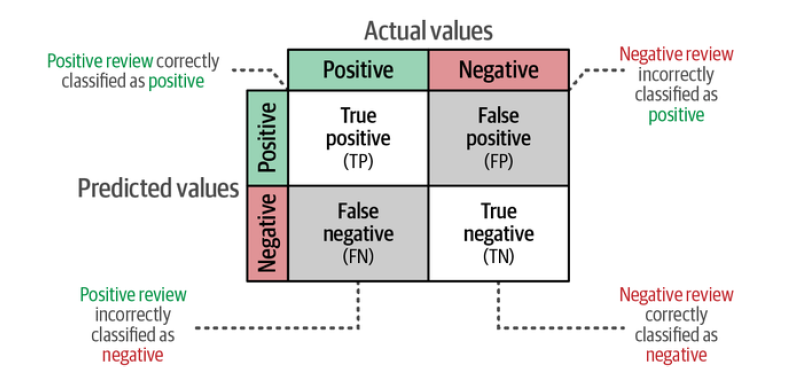

## Classification Tasks That Leverage Embeddings

In [13]:
from sentence_transformers import SentenceTransformer
# Load model
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
# Convert text to embeddings
train_embeddings = model.encode(data["train"]["text"],show_progress_bar=True)
test_embeddings = model.encode(data["test"]["text"],show_progress_bar=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/267 [00:00<?, ?it/s]

Batches:   0%|          | 0/34 [00:00<?, ?it/s]

In [14]:
train_embeddings.shape

(8530, 768)

In [15]:
from sklearn.linear_model import LogisticRegression
# Train a logistic regression on our train embeddings
clf = LogisticRegression(random_state=42)
clf.fit(train_embeddings, data["train"]["label"])

LogisticRegression(random_state=42)

In [16]:
## EVLAUATION

y_pred = clf.predict(test_embeddings)
evaluate_performance(data["test"]["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.85      0.86      0.85       533
Positive Review       0.86      0.85      0.85       533

       accuracy                           0.85      1066
      macro avg       0.85      0.85      0.85      1066
   weighted avg       0.85      0.85      0.85      1066



By training a classifier on top of our embeddings, we managed to get an F1 Score of0.85!

##SEntence Vs Token Level Embeddings

In [17]:
# from transformers import AutoTokenizer, AutoModel
# import torch

# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
# model = AutoModel.from_pretrained("bert-base-uncased")

# sentence = "how are you"
# tokens = tokenizer(sentence, return_tensors="pt")
# outputs = model(**tokens)

# # Token embeddings
# token_embeddings = outputs.last_hidden_state
# print(token_embeddings.shape)

In [18]:
# from sentence_transformers import SentenceTransformer

# model = SentenceTransformer('all-MiniLM-L6-v2')

# sentences = ["I love programming", "Coding is my favorite activity"]
# embeddings = model.encode(sentences)

# print(embeddings.shape)

## Zero SHot

In [19]:
# Create embeddings for our labels
label_embeddings = model.encode(["A negative review", "A positive review"])

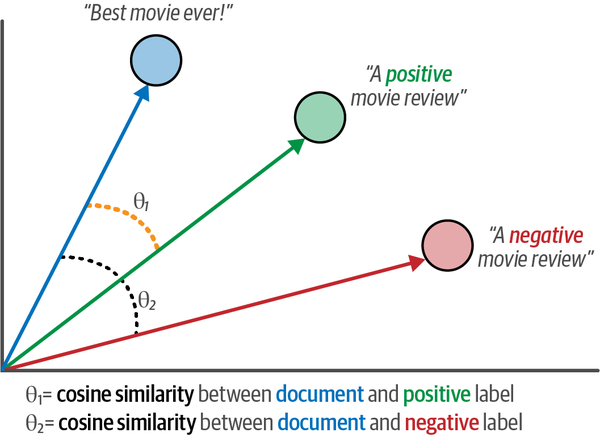

We can use cosine similarity to check how similar a given document is to the
description of the candidate labels.

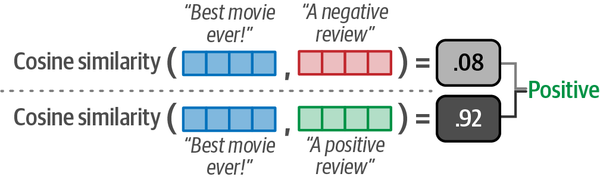


In [20]:
from sklearn.metrics.pairwise import cosine_similarity
sim_matrix = cosine_similarity(test_embeddings, label_embeddings)
y_pred = np.argmax(sim_matrix, axis=1)

In [21]:
evaluate_performance(data["test"]["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.78      0.77      0.78       533
Positive Review       0.77      0.79      0.78       533

       accuracy                           0.78      1066
      macro avg       0.78      0.78      0.78      1066
   weighted avg       0.78      0.78      0.78      1066



### Text Classification with Generative Models



In [22]:
# Load our model
pipe = pipeline(
"text2text-generation",
model="google/flan-t5-small",
device="cuda:0"
)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


Compared to our task-specific model, we cannot just give the model some text and
hope it will output the sentiment. Instead, we will have to instruct the model to do so.

Thus, we prefix each document with the prompt “Is the following sentence positive
or negative?”:

In [23]:
prompt = "Is the following sentence positive or negative? "
data = data.map(lambda example: {"t5": prompt + example['text']})
data

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 't5'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label', 't5'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label', 't5'],
        num_rows: 1066
    })
})

In [24]:
data["train"]["t5"][0]

'Is the following sentence positive or negative? the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .'

In [25]:
## Run inference
y_pred = []
for output in tqdm(pipe(KeyDataset(data["test"], "t5")),
  total=len(data["test"])):
  text = output[0]["generated_text"]
  print(text)
  y_pred.append(0 if text == "negative" else 1)

  0%|          | 3/1066 [00:00<04:22,  4.05it/s]

positive
positive
negative
positive


  1%|          | 8/1066 [00:01<01:43, 10.23it/s]

negative
positive
positive
negative


  1%|          | 13/1066 [00:01<01:13, 14.29it/s]

positive
positive
positive
negative
negative


  2%|▏         | 17/1066 [00:01<01:05, 16.04it/s]

positive
negative
positive
positive


  2%|▏         | 21/1066 [00:01<00:59, 17.43it/s]

positive
positive
positive
positive


  2%|▏         | 25/1066 [00:02<00:58, 17.74it/s]

negative
positive
positive
positive


  3%|▎         | 27/1066 [00:02<01:00, 17.13it/s]

negative
positive
positive


  3%|▎         | 32/1066 [00:02<01:00, 16.98it/s]

negative
positive
positive
negative


  3%|▎         | 36/1066 [00:02<00:56, 18.12it/s]

positive
positive
positive
positive


  4%|▍         | 40/1066 [00:02<00:56, 18.09it/s]

negative
positive
positive
positive


  4%|▍         | 45/1066 [00:03<00:54, 18.73it/s]

negative
positive
positive
positive
negative


  4%|▍         | 47/1066 [00:03<01:00, 16.74it/s]

positive
negative
positive
positive


  5%|▍         | 52/1066 [00:03<00:56, 17.90it/s]

positive
negative
positive
positive


  5%|▌         | 56/1066 [00:03<00:57, 17.48it/s]

negative
negative
positive
positive


  6%|▌         | 60/1066 [00:04<00:54, 18.35it/s]

negative
positive
positive
positive


  6%|▌         | 64/1066 [00:04<00:53, 18.79it/s]

positive
positive
positive
positive


  6%|▋         | 68/1066 [00:04<00:56, 17.58it/s]

positive
negative
positive
positive


  7%|▋         | 72/1066 [00:04<00:54, 18.24it/s]

positive
positive
positive
positive


  7%|▋         | 77/1066 [00:04<00:51, 19.15it/s]

positive
positive
positive
positive
positive


  8%|▊         | 82/1066 [00:05<00:50, 19.47it/s]

positive
positive
positive
positive


  8%|▊         | 86/1066 [00:05<00:52, 18.69it/s]

positive
positive
positive
positive


  9%|▊         | 91/1066 [00:05<00:50, 19.41it/s]

positive
positive
positive
positive
positive


  9%|▉         | 95/1066 [00:05<00:50, 19.38it/s]

positive
positive
positive
positive


  9%|▉         | 99/1066 [00:06<00:50, 19.05it/s]

positive
positive
positive
positive


 10%|▉         | 102/1066 [00:06<00:48, 19.90it/s]

positive
positive
positive
positive
positive


 10%|█         | 107/1066 [00:06<00:49, 19.24it/s]

positive
positive
positive
positive
positive


 11%|█         | 113/1066 [00:06<00:47, 20.14it/s]

positive
positive
positive
negative
positive


 11%|█         | 118/1066 [00:07<00:51, 18.40it/s]

positive
negative
negative
negative


 11%|█▏        | 122/1066 [00:07<00:53, 17.51it/s]

positive
positive
positive
positive


 12%|█▏        | 124/1066 [00:07<00:58, 16.01it/s]

positive
positive
positive
positive


 12%|█▏        | 129/1066 [00:07<00:58, 16.04it/s]

positive
positive
positive


 12%|█▏        | 131/1066 [00:08<01:15, 12.45it/s]

positive
positive


 12%|█▏        | 133/1066 [00:08<01:22, 11.35it/s]

positive
positive


 13%|█▎        | 135/1066 [00:08<01:31, 10.18it/s]

positive
negative
positive


 13%|█▎        | 139/1066 [00:08<01:21, 11.36it/s]

positive
positive
positive


 13%|█▎        | 141/1066 [00:09<01:21, 11.28it/s]

positive
positive


 13%|█▎        | 143/1066 [00:09<01:29, 10.26it/s]

positive
positive


 14%|█▎        | 145/1066 [00:09<01:30, 10.14it/s]

positive
positive
positive


 14%|█▍        | 148/1066 [00:09<01:49,  8.41it/s]

positive
positive


 14%|█▍        | 149/1066 [00:10<02:21,  6.49it/s]

positive


 14%|█▍        | 150/1066 [00:10<02:51,  5.34it/s]

positive


 14%|█▍        | 151/1066 [00:10<03:02,  5.01it/s]

positive


 14%|█▍        | 153/1066 [00:11<03:00,  5.04it/s]

positive
positive


 15%|█▍        | 155/1066 [00:11<03:05,  4.91it/s]

positive
positive


 15%|█▍        | 156/1066 [00:11<03:06,  4.88it/s]

positive
positive


 15%|█▍        | 159/1066 [00:12<02:43,  5.54it/s]

negative
positive


 15%|█▌        | 160/1066 [00:12<02:34,  5.87it/s]

positive


 15%|█▌        | 162/1066 [00:12<02:47,  5.39it/s]

positive
positive


 15%|█▌        | 165/1066 [00:13<01:58,  7.63it/s]

positive
positive
positive


 16%|█▌        | 167/1066 [00:13<01:41,  8.89it/s]

positive
positive
negative


 16%|█▌        | 171/1066 [00:13<01:26, 10.32it/s]

positive
positive
positive


 16%|█▌        | 173/1066 [00:13<01:35,  9.30it/s]

positive
positive


 16%|█▋        | 175/1066 [00:14<01:46,  8.37it/s]

positive
positive


 17%|█▋        | 178/1066 [00:14<01:35,  9.27it/s]

negative
negative
positive


 17%|█▋        | 181/1066 [00:14<01:32,  9.61it/s]

negative
positive
positive


 17%|█▋        | 184/1066 [00:15<01:30,  9.79it/s]

positive
positive
positive


 17%|█▋        | 186/1066 [00:15<01:35,  9.23it/s]

positive
positive


 18%|█▊        | 188/1066 [00:15<01:38,  8.95it/s]

negative
positive


 18%|█▊        | 190/1066 [00:15<01:29,  9.80it/s]

positive
positive
positive


 18%|█▊        | 194/1066 [00:16<01:23, 10.47it/s]

positive
positive
positive


 18%|█▊        | 196/1066 [00:16<01:18, 11.03it/s]

positive
positive
positive


 19%|█▉        | 200/1066 [00:16<01:16, 11.34it/s]

negative
positive
negative


 19%|█▉        | 202/1066 [00:16<01:21, 10.62it/s]

negative
positive
positive


 19%|█▉        | 206/1066 [00:17<01:19, 10.88it/s]

positive
positive
positive


 20%|█▉        | 208/1066 [00:17<01:20, 10.63it/s]

positive
positive
negative


 20%|█▉        | 211/1066 [00:17<01:44,  8.17it/s]

negative
positive


 20%|█▉        | 213/1066 [00:18<02:12,  6.43it/s]

positive
negative


 20%|██        | 215/1066 [00:18<02:21,  6.02it/s]

positive
positive


 20%|██        | 217/1066 [00:18<02:05,  6.75it/s]

negative
negative


 21%|██        | 219/1066 [00:19<01:49,  7.76it/s]

positive
positive


 21%|██        | 221/1066 [00:19<01:42,  8.28it/s]

positive
positive


 21%|██        | 223/1066 [00:19<01:42,  8.24it/s]

positive
positive
positive


 21%|██▏       | 227/1066 [00:19<01:24,  9.88it/s]

negative
negative
positive


 21%|██▏       | 229/1066 [00:20<01:19, 10.54it/s]

positive
positive
positive


 22%|██▏       | 231/1066 [00:20<01:15, 11.12it/s]

positive
positive


 22%|██▏       | 235/1066 [00:20<01:22, 10.07it/s]

positive
negative
positive


 22%|██▏       | 237/1066 [00:20<01:19, 10.46it/s]

positive
positive
positive


 23%|██▎       | 241/1066 [00:21<01:10, 11.69it/s]

positive
positive
positive


 23%|██▎       | 243/1066 [00:21<01:15, 10.83it/s]

positive
negative


 23%|██▎       | 245/1066 [00:21<01:22,  9.99it/s]

negative
positive
positive


 23%|██▎       | 248/1066 [00:22<01:25,  9.52it/s]

positive
positive


 23%|██▎       | 250/1066 [00:22<01:29,  9.16it/s]

negative
negative


 24%|██▎       | 252/1066 [00:22<01:30,  8.96it/s]

negative
negative


 24%|██▍       | 255/1066 [00:22<01:19, 10.14it/s]

positive
positive
positive
positive


 24%|██▍       | 258/1066 [00:23<01:41,  7.96it/s]

negative
positive


 24%|██▍       | 260/1066 [00:23<01:45,  7.63it/s]

negative
positive


 25%|██▍       | 262/1066 [00:23<02:00,  6.69it/s]

positive
positive


 25%|██▍       | 263/1066 [00:24<02:01,  6.61it/s]

positive


 25%|██▍       | 265/1066 [00:24<02:14,  5.96it/s]

positive
positive


 25%|██▌       | 267/1066 [00:24<02:08,  6.21it/s]

positive
positive


 25%|██▌       | 270/1066 [00:25<01:52,  7.10it/s]

negative
positive
positive


 26%|██▌       | 272/1066 [00:25<01:58,  6.71it/s]

positive
negative


 26%|██▌       | 274/1066 [00:25<02:03,  6.42it/s]

positive
negative


 26%|██▌       | 277/1066 [00:26<01:36,  8.16it/s]

positive
positive
positive


 26%|██▌       | 279/1066 [00:26<01:24,  9.30it/s]

positive
positive


 26%|██▋       | 281/1066 [00:26<01:29,  8.78it/s]

negative
negative
positive


 27%|██▋       | 285/1066 [00:26<01:12, 10.80it/s]

positive
positive
positive


 27%|██▋       | 287/1066 [00:26<01:12, 10.78it/s]

positive
positive
positive


 27%|██▋       | 289/1066 [00:27<01:13, 10.58it/s]

positive
positive


 27%|██▋       | 293/1066 [00:27<01:16, 10.08it/s]

positive
negative
positive


 28%|██▊       | 295/1066 [00:27<01:17,  9.96it/s]

negative
positive


 28%|██▊       | 298/1066 [00:28<01:18,  9.76it/s]

negative
positive
positive


 28%|██▊       | 300/1066 [00:28<01:14, 10.31it/s]

positive
positive
positive


 29%|██▊       | 304/1066 [00:28<01:13, 10.36it/s]

positive
positive
positive


 29%|██▊       | 306/1066 [00:28<01:15, 10.09it/s]

negative
negative


 29%|██▉       | 308/1066 [00:29<01:19,  9.55it/s]

positive
positive
positive


 29%|██▉       | 312/1066 [00:29<01:13, 10.32it/s]

negative
positive
positive


 29%|██▉       | 314/1066 [00:29<01:10, 10.73it/s]

positive
positive
positive


 30%|██▉       | 318/1066 [00:29<01:05, 11.35it/s]

positive
positive
positive


 30%|███       | 320/1066 [00:30<01:08, 10.88it/s]

positive
positive
positive


 30%|███       | 324/1066 [00:30<01:05, 11.27it/s]

positive
positive
positive


 31%|███       | 326/1066 [00:30<01:05, 11.35it/s]

positive
positive
positive


 31%|███       | 330/1066 [00:31<01:04, 11.50it/s]

positive
negative
positive


 31%|███       | 332/1066 [00:31<01:09, 10.60it/s]

positive
negative


 31%|███▏      | 334/1066 [00:31<01:11, 10.26it/s]

negative
positive
positive


 32%|███▏      | 338/1066 [00:31<01:08, 10.63it/s]

positive
negative
positive


 32%|███▏      | 340/1066 [00:32<01:04, 11.24it/s]

positive
positive
negative


 32%|███▏      | 344/1066 [00:32<01:08, 10.61it/s]

positive
positive
positive


 32%|███▏      | 346/1066 [00:32<01:10, 10.25it/s]

positive
positive
positive


 33%|███▎      | 350/1066 [00:32<01:03, 11.27it/s]

positive
positive
positive


 33%|███▎      | 352/1066 [00:33<01:00, 11.72it/s]

positive
positive
positive


 33%|███▎      | 356/1066 [00:33<01:05, 10.84it/s]

negative
positive
positive


 34%|███▎      | 358/1066 [00:33<01:04, 10.93it/s]

positive
positive
negative


 34%|███▍      | 362/1066 [00:34<01:04, 10.95it/s]

positive
negative
positive


 34%|███▍      | 364/1066 [00:34<01:02, 11.22it/s]

positive
positive
positive


 35%|███▍      | 368/1066 [00:34<01:01, 11.39it/s]

positive
positive
positive
positive


 35%|███▍      | 371/1066 [00:35<01:24,  8.18it/s]

positive
negative


 35%|███▍      | 372/1066 [00:35<01:40,  6.91it/s]

positive


 35%|███▍      | 373/1066 [00:35<02:06,  5.49it/s]

negative


 35%|███▌      | 374/1066 [00:35<02:20,  4.94it/s]

positive


 35%|███▌      | 375/1066 [00:36<02:45,  4.17it/s]

positive


 35%|███▌      | 376/1066 [00:36<03:20,  3.44it/s]

positive


 35%|███▌      | 377/1066 [00:37<03:44,  3.07it/s]

positive


 35%|███▌      | 378/1066 [00:37<03:47,  3.03it/s]

positive


 36%|███▌      | 379/1066 [00:37<04:16,  2.68it/s]

positive


 36%|███▌      | 380/1066 [00:38<04:06,  2.78it/s]

positive


 36%|███▌      | 381/1066 [00:38<04:12,  2.72it/s]

negative


 36%|███▌      | 383/1066 [00:39<03:10,  3.59it/s]

positive
positive


 36%|███▌      | 385/1066 [00:39<02:07,  5.34it/s]

positive
positive
positive


 36%|███▋      | 389/1066 [00:39<01:24,  8.00it/s]

negative
positive
positive


 37%|███▋      | 391/1066 [00:39<01:14,  9.05it/s]

positive
positive
positive


 37%|███▋      | 395/1066 [00:40<01:06, 10.16it/s]

positive
positive
positive


 37%|███▋      | 397/1066 [00:40<01:02, 10.69it/s]

positive
positive
positive


 38%|███▊      | 401/1066 [00:40<01:03, 10.55it/s]

positive
positive
negative


 38%|███▊      | 403/1066 [00:40<00:58, 11.28it/s]

positive
positive
positive


 38%|███▊      | 407/1066 [00:41<01:02, 10.52it/s]

positive
positive
positive


 38%|███▊      | 409/1066 [00:41<01:02, 10.58it/s]

positive
positive
positive


 39%|███▊      | 413/1066 [00:41<01:01, 10.54it/s]

positive
negative
positive


 39%|███▉      | 415/1066 [00:41<01:00, 10.70it/s]

positive
positive
positive


 39%|███▉      | 417/1066 [00:42<01:02, 10.43it/s]

positive
negative


 39%|███▉      | 421/1066 [00:42<00:59, 10.77it/s]

positive
positive
positive


 40%|███▉      | 423/1066 [00:42<00:59, 10.84it/s]

negative
positive
positive


 40%|████      | 427/1066 [00:43<00:57, 11.10it/s]

positive
positive
positive


 40%|████      | 429/1066 [00:43<01:00, 10.49it/s]

positive
negative
positive


 40%|████      | 431/1066 [00:43<00:59, 10.68it/s]

positive
positive


 41%|████      | 435/1066 [00:43<00:57, 11.02it/s]

negative
positive
positive


 41%|████      | 437/1066 [00:43<00:53, 11.73it/s]

positive
positive
positive


 41%|████▏     | 441/1066 [00:44<00:54, 11.46it/s]

positive
positive
positive


 42%|████▏     | 443/1066 [00:44<00:55, 11.14it/s]

positive
positive
negative


 42%|████▏     | 445/1066 [00:44<00:58, 10.65it/s]

positive
positive


 42%|████▏     | 447/1066 [00:44<01:01, 10.08it/s]

positive
positive


 42%|████▏     | 451/1066 [00:45<01:02,  9.87it/s]

positive
positive
positive


 42%|████▏     | 453/1066 [00:45<01:01,  9.95it/s]

positive
negative


 43%|████▎     | 455/1066 [00:45<01:05,  9.34it/s]

negative
negative
positive


 43%|████▎     | 459/1066 [00:46<00:56, 10.83it/s]

negative
positive
positive


 43%|████▎     | 461/1066 [00:46<00:52, 11.56it/s]

positive
positive
positive


 44%|████▎     | 465/1066 [00:46<00:52, 11.48it/s]

positive
positive
positive


 44%|████▍     | 467/1066 [00:46<00:50, 11.77it/s]

positive
positive
positive


 44%|████▍     | 471/1066 [00:47<00:52, 11.43it/s]

positive
negative
positive


 44%|████▍     | 473/1066 [00:47<00:52, 11.34it/s]

positive
positive
negative


 45%|████▍     | 477/1066 [00:47<00:54, 10.87it/s]

positive
positive
positive


 45%|████▍     | 479/1066 [00:47<00:51, 11.32it/s]

positive
positive
positive


 45%|████▌     | 483/1066 [00:48<00:53, 10.82it/s]

positive
positive
positive


 45%|████▌     | 485/1066 [00:48<00:54, 10.58it/s]

positive
negative


 46%|████▌     | 487/1066 [00:48<01:00,  9.55it/s]

positive
positive


 46%|████▌     | 489/1066 [00:49<01:20,  7.20it/s]

positive
negative


 46%|████▌     | 490/1066 [00:49<01:36,  5.97it/s]

positive


 46%|████▌     | 491/1066 [00:49<01:52,  5.12it/s]

positive


 46%|████▌     | 492/1066 [00:49<02:01,  4.71it/s]

positive


 46%|████▋     | 494/1066 [00:50<02:06,  4.52it/s]

positive
positive


 46%|████▋     | 495/1066 [00:50<02:49,  3.38it/s]

negative


 47%|████▋     | 496/1066 [00:51<02:52,  3.30it/s]

negative


 47%|████▋     | 497/1066 [00:52<05:01,  1.89it/s]

positive


 47%|████▋     | 498/1066 [00:52<04:25,  2.14it/s]

positive
positive


 47%|████▋     | 501/1066 [00:53<02:44,  3.43it/s]

positive
positive


 47%|████▋     | 504/1066 [00:53<01:44,  5.39it/s]

negative
positive
positive


 47%|████▋     | 506/1066 [00:53<01:30,  6.19it/s]

positive
positive


 48%|████▊     | 509/1066 [00:54<01:12,  7.74it/s]

positive
positive
positive


 48%|████▊     | 510/1066 [00:54<01:09,  8.00it/s]

positive


 48%|████▊     | 511/1066 [00:54<01:20,  6.86it/s]

positive


 48%|████▊     | 513/1066 [00:54<01:40,  5.49it/s]

positive
positive


 48%|████▊     | 516/1066 [00:54<01:02,  8.85it/s]

positive
positive
positive
positive


 49%|████▉     | 521/1066 [00:55<00:40, 13.61it/s]

positive
positive
positive
positive
positive


 49%|████▉     | 527/1066 [00:55<00:30, 17.40it/s]

positive
positive
positive
positive
positive


 50%|████▉     | 529/1066 [00:55<00:36, 14.58it/s]

positive
positive


 50%|████▉     | 531/1066 [00:55<00:44, 11.92it/s]

positive
positive


 50%|█████     | 533/1066 [00:56<00:51, 10.37it/s]

positive
positive


 50%|█████     | 537/1066 [00:56<00:46, 11.34it/s]

negative
positive
negative
negative


 51%|█████     | 539/1066 [00:56<00:43, 12.07it/s]

negative
positive
negative


 51%|█████     | 543/1066 [00:56<00:39, 13.14it/s]

negative
negative
negative
negative


 51%|█████▏    | 547/1066 [00:57<00:37, 13.84it/s]

positive
negative
negative


 52%|█████▏    | 551/1066 [00:57<00:35, 14.31it/s]

negative
positive
negative
negative


 52%|█████▏    | 555/1066 [00:57<00:33, 15.30it/s]

positive
negative
negative
negative


 52%|█████▏    | 559/1066 [00:58<00:34, 14.65it/s]

negative
negative
negative
negative


 53%|█████▎    | 563/1066 [00:58<00:33, 15.08it/s]

negative
negative
negative
negative


 53%|█████▎    | 567/1066 [00:58<00:30, 16.18it/s]

negative
negative
positive
negative


 54%|█████▎    | 571/1066 [00:58<00:30, 16.20it/s]

negative
negative
negative
negative


 54%|█████▍    | 575/1066 [00:59<00:31, 15.49it/s]

negative
negative
negative
negative


 54%|█████▍    | 577/1066 [00:59<00:31, 15.47it/s]

negative
negative
negative


 55%|█████▍    | 581/1066 [00:59<00:32, 14.92it/s]

negative
negative
negative


 55%|█████▍    | 585/1066 [00:59<00:31, 15.10it/s]

negative
negative
negative
positive


 55%|█████▌    | 589/1066 [00:59<00:30, 15.62it/s]

negative
negative
negative
negative


 56%|█████▌    | 593/1066 [01:00<00:29, 16.17it/s]

negative
negative
negative
negative


 56%|█████▌    | 595/1066 [01:00<00:30, 15.69it/s]

negative
negative
positive
negative


 56%|█████▋    | 600/1066 [01:00<00:27, 16.87it/s]

negative
positive
positive
negative


 57%|█████▋    | 605/1066 [01:00<00:26, 17.64it/s]

positive
negative
positive
negative


 57%|█████▋    | 609/1066 [01:01<00:25, 17.59it/s]

positive
negative
positive
negative


 58%|█████▊    | 613/1066 [01:01<00:27, 16.72it/s]

positive
negative
negative
negative


 58%|█████▊    | 617/1066 [01:01<00:27, 16.48it/s]

negative
positive
positive
negative


 58%|█████▊    | 621/1066 [01:01<00:27, 16.01it/s]

negative
negative
negative
negative


 58%|█████▊    | 623/1066 [01:02<00:29, 15.11it/s]

negative
negative
negative


 59%|█████▉    | 627/1066 [01:02<00:35, 12.48it/s]

negative
negative
negative


 59%|█████▉    | 629/1066 [01:02<00:36, 11.91it/s]

negative
negative
negative


 59%|█████▉    | 633/1066 [01:02<00:33, 12.80it/s]

negative
negative
positive
positive


 60%|█████▉    | 637/1066 [01:03<00:33, 12.85it/s]

negative
negative
negative


 60%|█████▉    | 639/1066 [01:03<00:33, 12.90it/s]

negative
negative
positive


 60%|██████    | 643/1066 [01:03<00:34, 12.21it/s]

negative
negative
negative


 61%|██████    | 645/1066 [01:03<00:37, 11.23it/s]

negative
negative
positive


 61%|██████    | 647/1066 [01:04<00:37, 11.26it/s]

negative
negative


 61%|██████    | 651/1066 [01:04<00:36, 11.34it/s]

negative
negative
negative


 61%|██████▏   | 653/1066 [01:04<00:34, 11.93it/s]

negative
negative
negative


 62%|██████▏   | 657/1066 [01:04<00:30, 13.63it/s]

negative
negative
negative
negative


 62%|██████▏   | 661/1066 [01:05<00:29, 13.91it/s]

negative
negative
negative
negative


 62%|██████▏   | 666/1066 [01:05<00:25, 15.75it/s]

negative
negative
positive
negative


 63%|██████▎   | 668/1066 [01:05<00:25, 15.45it/s]

negative
negative
negative


 63%|██████▎   | 672/1066 [01:05<00:25, 15.36it/s]

negative
negative
positive
negative


 63%|██████▎   | 676/1066 [01:06<00:24, 15.73it/s]

negative
negative
negative
negative


 64%|██████▍   | 680/1066 [01:06<00:22, 16.81it/s]

negative
positive
negative
negative


 64%|██████▍   | 684/1066 [01:06<00:23, 16.42it/s]

negative
negative
negative
negative


 65%|██████▍   | 688/1066 [01:06<00:26, 14.46it/s]

negative
negative
negative


 65%|██████▍   | 692/1066 [01:07<00:23, 15.99it/s]

negative
positive
negative
positive


 65%|██████▌   | 696/1066 [01:07<00:22, 16.23it/s]

negative
negative
negative
negative


 66%|██████▌   | 700/1066 [01:07<00:21, 17.16it/s]

negative
positive
negative
positive


 66%|██████▌   | 704/1066 [01:07<00:21, 16.89it/s]

negative
negative
negative
negative


 66%|██████▌   | 706/1066 [01:07<00:21, 16.49it/s]

negative
negative
negative


 67%|██████▋   | 710/1066 [01:08<00:22, 15.57it/s]

negative
negative
negative
negative


 67%|██████▋   | 714/1066 [01:08<00:21, 16.29it/s]

negative
positive
negative
negative


 67%|██████▋   | 719/1066 [01:08<00:20, 16.84it/s]

negative
negative
negative
negative


 68%|██████▊   | 723/1066 [01:08<00:20, 16.94it/s]

negative
negative
negative
positive


 68%|██████▊   | 727/1066 [01:09<00:20, 16.93it/s]

negative
negative
positive
negative


 68%|██████▊   | 729/1066 [01:09<00:20, 16.83it/s]

negative
negative
negative
negative


 69%|██████▉   | 734/1066 [01:09<00:19, 16.93it/s]

negative
positive
negative
negative


 69%|██████▉   | 738/1066 [01:09<00:19, 16.60it/s]

negative
positive
negative
negative


 69%|██████▉   | 740/1066 [01:10<00:20, 16.06it/s]

negative
negative


 70%|██████▉   | 744/1066 [01:10<00:23, 13.97it/s]

negative
negative
negative
positive


 70%|███████   | 749/1066 [01:10<00:20, 15.49it/s]

positive
negative
negative
negative


 71%|███████   | 753/1066 [01:10<00:20, 15.44it/s]

negative
negative
negative
negative


 71%|███████   | 755/1066 [01:11<00:22, 13.62it/s]

negative
negative
positive


 71%|███████   | 759/1066 [01:11<00:23, 13.28it/s]

negative
negative
negative


 72%|███████▏  | 763/1066 [01:11<00:20, 14.72it/s]

negative
negative
negative
negative


 72%|███████▏  | 767/1066 [01:11<00:19, 15.52it/s]

positive
negative
negative
negative


 72%|███████▏  | 771/1066 [01:12<00:18, 16.22it/s]

negative
negative
negative
negative


 73%|███████▎  | 773/1066 [01:12<00:17, 16.42it/s]

negative
negative
positive
negative


 73%|███████▎  | 778/1066 [01:12<00:17, 16.83it/s]

negative
negative
negative
negative


 73%|███████▎  | 782/1066 [01:12<00:17, 16.36it/s]

negative
negative
negative
negative


 74%|███████▎  | 786/1066 [01:13<00:18, 15.25it/s]

negative
negative
negative
negative


 74%|███████▍  | 790/1066 [01:13<00:17, 15.37it/s]

negative
negative
negative


 74%|███████▍  | 792/1066 [01:13<00:17, 15.23it/s]

negative
negative
negative
negative


 75%|███████▍  | 797/1066 [01:13<00:16, 16.39it/s]

negative
negative
negative
negative


 75%|███████▌  | 801/1066 [01:13<00:16, 16.05it/s]

negative
negative
negative
negative


 76%|███████▌  | 805/1066 [01:14<00:15, 16.49it/s]

negative
negative
negative
negative


 76%|███████▌  | 807/1066 [01:14<00:16, 15.68it/s]

negative
positive


 76%|███████▌  | 811/1066 [01:14<00:19, 12.78it/s]

negative
negative
negative


 76%|███████▋  | 813/1066 [01:14<00:19, 12.83it/s]

positive
negative
negative


 77%|███████▋  | 817/1066 [01:15<00:20, 12.36it/s]

negative
negative
positive


 77%|███████▋  | 819/1066 [01:15<00:19, 12.55it/s]

negative
negative
positive


 77%|███████▋  | 823/1066 [01:15<00:18, 12.90it/s]

negative
negative
negative


 77%|███████▋  | 825/1066 [01:15<00:20, 11.49it/s]

negative
negative
negative


 78%|███████▊  | 829/1066 [01:16<00:20, 11.55it/s]

negative
negative
negative


 78%|███████▊  | 831/1066 [01:16<00:21, 10.93it/s]

negative
negative
positive


 78%|███████▊  | 835/1066 [01:16<00:18, 12.43it/s]

negative
negative
negative
negative


 79%|███████▊  | 839/1066 [01:17<00:15, 14.39it/s]

negative
positive
negative
negative


 79%|███████▉  | 843/1066 [01:17<00:14, 14.94it/s]

negative
positive
negative
negative


 79%|███████▉  | 847/1066 [01:17<00:15, 14.06it/s]

negative
negative
negative


 80%|███████▉  | 851/1066 [01:17<00:14, 15.03it/s]

negative
negative
negative
negative


 80%|████████  | 855/1066 [01:18<00:13, 15.84it/s]

negative
negative
negative
negative


 80%|████████  | 857/1066 [01:18<00:12, 16.26it/s]

positive
negative
negative


 81%|████████  | 861/1066 [01:18<00:12, 16.12it/s]

negative
negative
positive
negative


 81%|████████  | 865/1066 [01:18<00:12, 15.67it/s]

negative
negative
negative
positive


 82%|████████▏ | 869/1066 [01:18<00:12, 15.68it/s]

negative
negative
negative
negative


 82%|████████▏ | 873/1066 [01:19<00:11, 16.17it/s]

positive
negative
negative
negative


 82%|████████▏ | 877/1066 [01:19<00:11, 15.81it/s]

negative
negative
negative
negative


 83%|████████▎ | 881/1066 [01:19<00:11, 15.75it/s]

negative
negative
positive
positive


 83%|████████▎ | 886/1066 [01:19<00:10, 17.38it/s]

negative
negative
negative
negative


 83%|████████▎ | 890/1066 [01:20<00:09, 17.76it/s]

negative
positive
positive
negative


 84%|████████▎ | 892/1066 [01:20<00:09, 17.42it/s]

negative
negative
negative


 84%|████████▍ | 896/1066 [01:20<00:09, 17.21it/s]

negative
positive
positive
negative


 84%|████████▍ | 900/1066 [01:20<00:10, 16.08it/s]

negative
negative
negative
negative


 85%|████████▍ | 904/1066 [01:21<00:09, 17.00it/s]

negative
negative
negative
negative


 85%|████████▌ | 908/1066 [01:21<00:09, 16.84it/s]

negative
negative
negative
negative


 86%|████████▌ | 912/1066 [01:21<00:10, 15.18it/s]

negative
negative
negative


 86%|████████▌ | 916/1066 [01:21<00:09, 15.93it/s]

negative
negative
negative
negative


 86%|████████▋ | 920/1066 [01:22<00:08, 16.25it/s]

negative
negative
negative
negative


 86%|████████▋ | 922/1066 [01:22<00:08, 16.66it/s]

negative
positive
positive
positive


 87%|████████▋ | 927/1066 [01:22<00:08, 16.35it/s]

negative
negative
negative


 87%|████████▋ | 931/1066 [01:22<00:08, 16.25it/s]

negative
negative
negative
negative


 88%|████████▊ | 935/1066 [01:22<00:07, 17.04it/s]

negative
positive
negative
positive


 88%|████████▊ | 939/1066 [01:23<00:07, 16.88it/s]

negative
negative
negative
negative


 88%|████████▊ | 943/1066 [01:23<00:07, 16.83it/s]

positive
negative
negative
negative


 89%|████████▊ | 945/1066 [01:23<00:07, 15.92it/s]

positive
negative
negative


 89%|████████▉ | 949/1066 [01:23<00:07, 14.90it/s]

negative
negative
negative
positive


 89%|████████▉ | 953/1066 [01:24<00:07, 15.80it/s]

negative
negative
negative
negative


 90%|████████▉ | 957/1066 [01:24<00:06, 15.83it/s]

negative
negative
negative
negative


 90%|█████████ | 961/1066 [01:24<00:06, 15.70it/s]

negative
negative
positive
negative


 91%|█████████ | 965/1066 [01:24<00:06, 15.74it/s]

negative
negative
negative
negative


 91%|█████████ | 969/1066 [01:25<00:06, 15.66it/s]

negative
negative
negative
negative


 91%|█████████▏| 973/1066 [01:25<00:06, 15.38it/s]

negative
negative
negative
negative


 92%|█████████▏| 977/1066 [01:25<00:05, 15.38it/s]

positive
positive
negative
negative


 92%|█████████▏| 981/1066 [01:25<00:05, 16.11it/s]

negative
negative
negative
negative


 92%|█████████▏| 985/1066 [01:26<00:05, 16.08it/s]

negative
negative
negative
negative


 93%|█████████▎| 989/1066 [01:26<00:04, 16.01it/s]

negative
negative
negative
positive


 93%|█████████▎| 992/1066 [01:26<00:04, 17.05it/s]

positive
negative
negative


 93%|█████████▎| 996/1066 [01:26<00:05, 13.58it/s]

positive
negative
negative


 94%|█████████▎| 998/1066 [01:27<00:05, 13.47it/s]

negative
negative
positive
negative


 94%|█████████▍| 1002/1066 [01:27<00:04, 12.99it/s]

negative
negative
negative


 94%|█████████▍| 1006/1066 [01:27<00:04, 12.49it/s]

negative
negative
positive


 95%|█████████▍| 1008/1066 [01:27<00:04, 12.20it/s]

negative
negative
negative


 95%|█████████▍| 1012/1066 [01:28<00:04, 13.20it/s]

positive
negative
negative


 95%|█████████▌| 1014/1066 [01:28<00:04, 12.26it/s]

negative
negative
positive


 95%|█████████▌| 1016/1066 [01:28<00:04, 11.62it/s]

negative
negative
negative


 96%|█████████▌| 1020/1066 [01:28<00:04, 10.84it/s]

negative
positive
negative


 96%|█████████▌| 1024/1066 [01:29<00:03, 12.47it/s]

negative
negative
negative
negative


 96%|█████████▋| 1028/1066 [01:29<00:02, 14.63it/s]

negative
positive
negative
negative


 97%|█████████▋| 1032/1066 [01:29<00:02, 15.28it/s]

negative
negative
positive
negative


 97%|█████████▋| 1036/1066 [01:29<00:01, 15.08it/s]

negative
negative
negative


 97%|█████████▋| 1038/1066 [01:30<00:01, 15.72it/s]

negative
positive
positive
positive


 98%|█████████▊| 1043/1066 [01:30<00:01, 17.56it/s]

negative
negative
negative
negative


 98%|█████████▊| 1047/1066 [01:30<00:01, 16.93it/s]

negative
negative
negative
negative


 99%|█████████▊| 1051/1066 [01:30<00:00, 16.25it/s]

negative
negative
negative


 99%|█████████▉| 1053/1066 [01:30<00:00, 15.23it/s]

negative
negative
negative


 99%|█████████▉| 1057/1066 [01:31<00:00, 14.72it/s]

negative
negative
negative
negative


100%|█████████▉| 1061/1066 [01:31<00:00, 15.67it/s]

negative
negative
negative
negative


100%|█████████▉| 1065/1066 [01:31<00:00, 15.16it/s]

positive
negative
negative


100%|██████████| 1066/1066 [01:31<00:00, 11.61it/s]

negative


In [26]:
evaluate_performance(data["test"]["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.83      0.85      0.84       533
Positive Review       0.85      0.83      0.84       533

       accuracy                           0.84      1066
      macro avg       0.84      0.84      0.84      1066
   weighted avg       0.84      0.84      0.84      1066

